# 組別：雙人組
* 成員：<br/>
M114020018 許承弘<br/>
M114020043 張光緯<br/>
E225150802 陳煒廂 (高醫大)

# 影片連結：https://www.youtube.com/watch?v=5zTDNqDpvn8

# 主要目標：觀測科技產業的前景發展
* 版面：科技版(Tech_Job)、八卦版
* 時間:2023.07.01 - 2023.12.31(6個月)
* 關鍵字：聯發科,群聯電子,艾司摩爾,台積電,台灣美光
* 預計目標：觀測科技產業的前景發展，以台灣前五大科技業公司為例來篩選資料，為求職者找到自己理想的工作環境
* 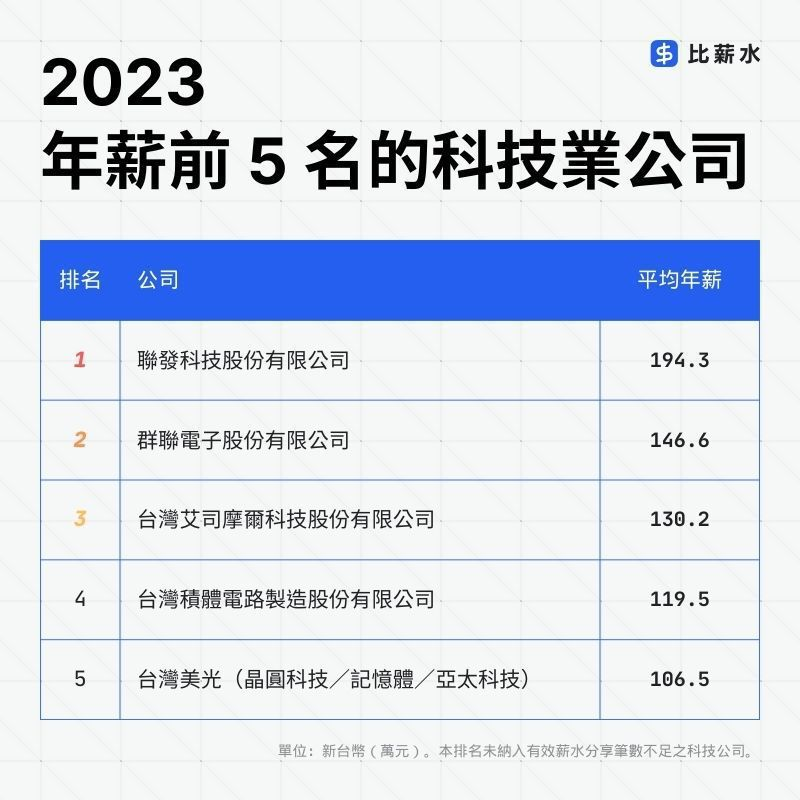
* 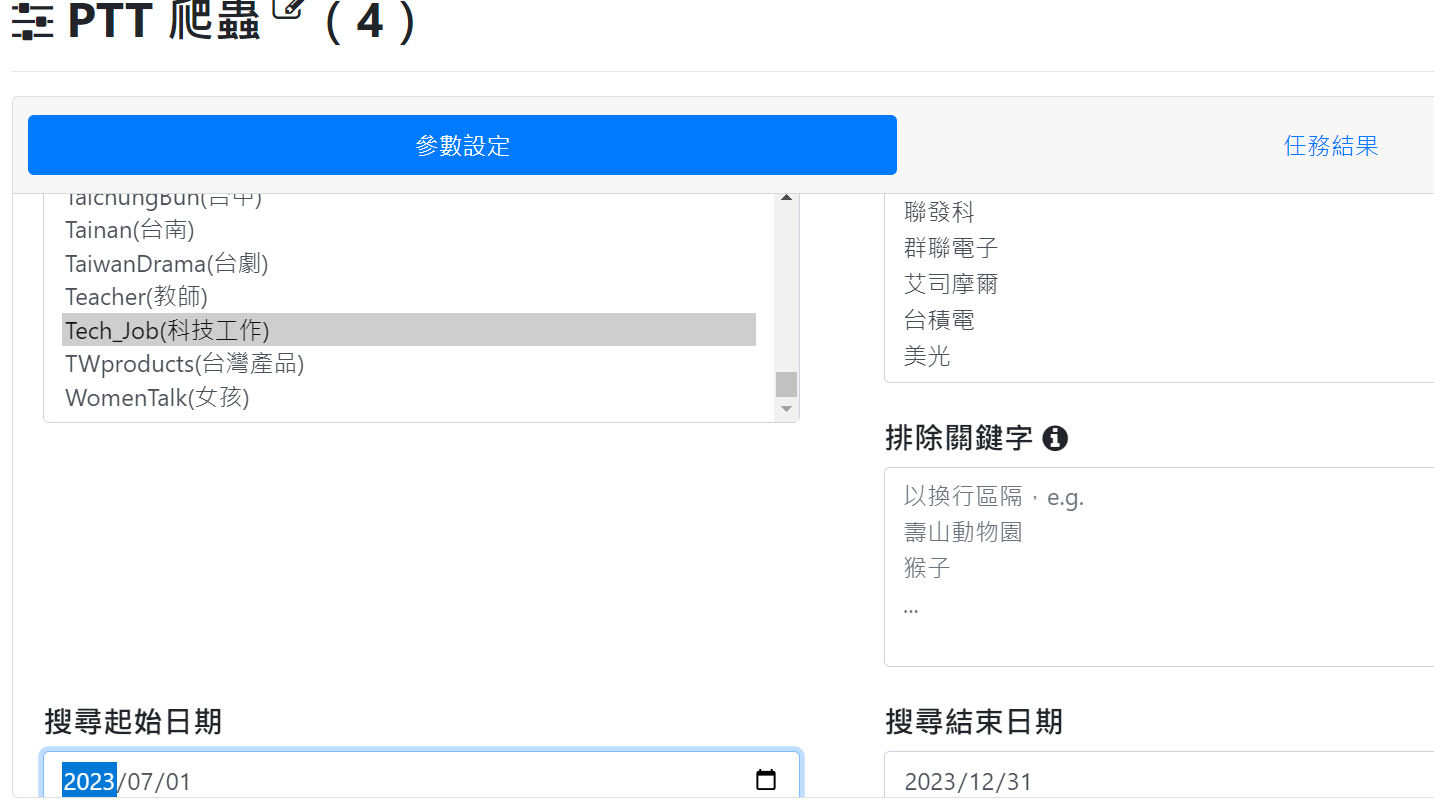
* 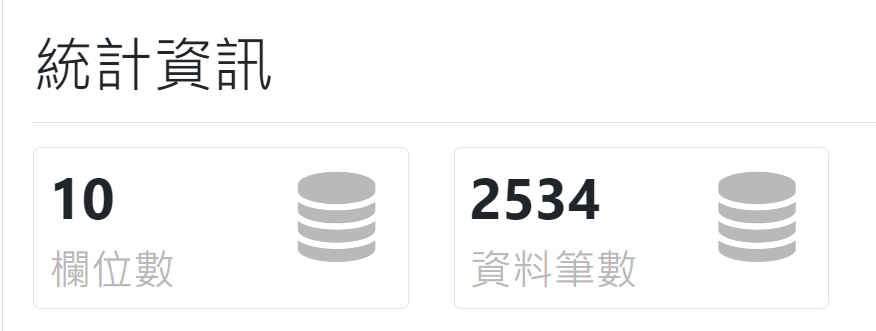

## 環境設定

#### 套件安裝

In [ ]:
# 套件下載
!pip install -U pyvis
!pip install -U names

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 789.1/789.1 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for names: filename=names-0.3.0-py3-none-any.whl size=803682 sha256=1bfbb723b91ef042f862aa361252111d46fb524f82db30709577ca5fad368159
  Stored in directory: /root/.cache/pip/wheels/fc/9a/6f/78f4282bbcaa2d8c678b73c54c0bb1b7a04009f0d7cec79fce
Successfully built names


In [ ]:
# 安裝會使用到的套件
# 安裝ckiptagger前要先安裝tensorflow，有套件相依的問題
!pip install -U ckiptagger\[tf,gdown\]
!pip install wordcloud SnowNLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 36.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for SnowNLP: filename=snownlp-0.12.3-py3-none-any.whl size=37760946 sha256=e284650c36100a45b0be4729d6fee0576f16cb37088e51b5541ccec4dc00da2c
  Stored in directory: /root/.cache/pip/wheels/43/f3/70/8990fc249efeb396007766676706f71dd3d1ca3c023ce522ce
Successfully built SnowNLP


In [ ]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.1 MB/s eta 0:00:00


In [ ]:
!pip install sentence_transformers
!pip install ckip_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 2.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

#### 匯入套件

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
import re
import jieba
import jieba.analyse
from datetime import datetime
import datetime
from wordcloud import WordCloud
import math
from nltk import ngrams
from collections import defaultdict
from nltk import FreqDist
from collections import Counter, namedtuple
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from numpy.linalg import norm
import time

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pyvis
import IPython
import random
import networkx as nx
from itertools import combinations

from ckiptagger import data_utils, construct_dictionary, WS, POS, NER
from snownlp import SnowNLP

from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel
from gensim.models.ldamulticore import LdaMulticore
from gensim.matutils import corpus2csc, corpus2dense, Sparse2Corpus

import pyLDAvis
import pyLDAvis.gensim_models

In [ ]:
from transformers import BertTokenizerFast, AutoTokenizer, AutoModelForTokenClassification, AutoModelForSequenceClassification, pipeline
from sentence_transformers import SentenceTransformer
from ckip_transformers.nlp import CkipWordSegmenter, CkipPosTagger, CkipNerChunker

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### 連接雲端

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/雙人組社媒期末專案') #切換該目錄
os.listdir() #確認目錄內容

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['SocialMedia_Final.ipynb',
 'TaipeiSansTCBeta-Regular.ttf',
 'dict',
 'raw_data',
 'pic']

#### 設定中文字型

In [ ]:
matplotlib.font_manager.fontManager.addfont('/content/drive/MyDrive/雙人組社媒期末專案/TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 設定字體
plt.rcParams['font.size'] = '16'
plt.rcParams["figure.figsize"] = [6, 4]
plt.rcParams["figure.dpi"] = 150

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### CKIP安裝

In [ ]:
data_utils.download_data_gdown("./")  # 下載ckip model

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Downloading...
From (original): https://drive.google.com/uc?id=1efHsY16pxK0lBD2gYCgCTnv1Swstq771
From (redirected): https://drive.google.com/uc?id=1efHsY16pxK0lBD2gYCgCTnv1Swstq771&confirm=t&uuid=cc3a3def-12a2-47d6-9ce1-ec84c90e3123
To: /content/data.zip
100%|██████████| 1.88G/1.88G [00:14<00:00, 130MB/s]


In [ ]:
# 將三份工具的模型路徑指向我們剛才下載的檔案「data」
ws = WS("./data")
pos = POS("./data")
ner = NER("./data")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/ckiptagger/model_ws.py:106: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)
/usr/local/lib/python3.10/dist-packages/ckiptagger/model_pos.py:56: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden

## 讀取資料集

In [ ]:
df = pd.read_csv('./raw_data/TechJob.csv')

df = df.dropna(axis = 0,how = "any")

df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


system_id                                             artUrl  \
0             1  https://www.ptt.cc/bbs/Gossiping/M.1688140859....   
1             2  https://www.ptt.cc/bbs/Gossiping/M.1688148966....   
2             3  https://www.ptt.cc/bbs/Gossiping/M.1688150076....   
3             4  https://www.ptt.cc/bbs/Gossiping/M.1688171873....   
4             5  https://www.ptt.cc/bbs/Gossiping/M.1688173592....   
...         ...                                                ...   
2486       2487  https://www.ptt.cc/bbs/Tech_Job/M.1703874209.A...   
2487       2488  https://www.ptt.cc/bbs/Tech_Job/M.1703950238.A...   
2488       2489  https://www.ptt.cc/bbs/Tech_Job/M.1703953890.A...   
2489       2490  https://www.ptt.cc/bbs/Tech_Job/M.1704020545.A...   
2490       2491  https://www.ptt.cc/bbs/Tech_Job/M.1704034806.A...   

                        artTitle              artDate     artPoster  \
0       [新聞]美國、荷蘭揮組合拳痛擊中國晶片商SMIC  2023-07-01 00:00:55        ttucse   
1               [問卦]荷蘭艾司摩爾為啥這麼強？  2023-07-01 02:16:03   lonzoball02   
2            Re:[問卦]荷蘭艾司摩爾為啥這麼強？  2023-07-01 02:34:34     meblessme   
3          [問卦]台大電機系的學生說唸物理只能要飯？  2023-07-01 08:37:51       Qunnine   
4         [新聞]半導體競爭力隱憂！國內綠電不足，台積  2023-07-01 09:06:30       DANANPA   
...                          ...                  ...           ...   
2486  [新聞]台積電首度提及1奈米A10工藝預計2030年  2023-12-30 02:23:27      godofsex   
2487   [新聞]日媒：台積電熊本廠擬2024年2/24開幕  2023-12-30 23:30:36  qazxc1156892   
2488     [新聞]台積電美國廠必須轉彎了！為何劉德音將退  2023-12-31 00:31:28          AAAB   
2489             [新聞]三星旗艦機來了台鏈吃補  2023-12-31 19:02:08    hvariables   
2490      [新聞]熊本知事：台積電設廠是百年一遇大機會  2023-12-31 23:00:04      godofsex   

     artCatagory                                         artContent  \
0      Gossiping  美國、荷蘭揮組合拳痛擊中國晶片商 SMIC遭盯上\nhttps://m.moneydj.co...   
1      Gossiping  荷蘭公司艾司摩爾\n做半導體的\n\n半導體台灣不是世界最頂的嗎？\n\n荷蘭不是剩文化和觀...   
2      Gossiping  荷蘭沒有on call, 沒有高工時，沒有996 沒有低薪\n就是家歐洲公司\n不用賣新鮮肝...   
3      Gossiping  前陣子經過公館啦！\n\n應該是電機系的學生\n\nA：我覺得你碩班還是唸電機的好\n\n跑...   
4      Gossiping  1.媒體來源: 科技新報\n\n2.記者署名: 林妤柔\n\n3.完整新聞標題:\n半導體競...   
...          ...                                                ...   
2486    Tech_Job  台積電首度提及1奈米A10工藝　預計2030年完成\n\n2023/12/28 15:16\...   
2487    Tech_Job  新聞標題： 日媒：台積電熊本廠擬2024年2/24開幕\n\n（中央社東京30日綜合外電報導...   
2488    Tech_Job  https://www.businesstoday.com.tw/article/categ...   
2489    Tech_Job  https://udn.com/news/story/7240/7676644\n三星旗艦機...   
2490    Tech_Job  熊本知事：台積電設廠是百年一遇重大機會\n\nYahoo奇摩（即時新聞）\n\n2023年1...   

                                             artComment             e_ip  \
0     [{"cmtStatus": "推", "cmtPoster": "WeAntiTVBS",...    218.172.21.71   
1     [{"cmtStatus": "→", "cmtPoster": "whiteadam", ...     118.167.2.61   
2     [{"cmtStatus": "→", "cmtPoster": "showwin", "c...    42.73.130.239   
3     [{"cmtStatus": "噓", "cmtPoster": "railman", "c...   118.167.19.120   
4     [{"cmtStatus": "→", "cmtPoster": "s820912gmail...    106.64.160.11   
...                                                 ...              ...   
2486  [{"cmtStatus": "推", "cmtPoster": "ohohohya", "...    49.216.191.98   
2487  [{"cmtStatus": "推", "cmtPoster": "oldchang1205...  223.137.217.103   
2488  [{"cmtStatus": "推", "cmtPoster": "sinon17", "c...   123.194.181.81   
2489  [{"cmtStatus": "噓", "cmtPoster": "pf775", "cmt...    61.230.162.42   
2490  [{"cmtStatus": "→", "cmtPoster": "gn01216674",...    49.216.191.98   

             insertedDate dataSource  
0     2023-07-01 01:48:29        ptt  
1     2023-07-02 01:33:04        ptt  
2     2023-07-02 01:33:04        ptt  
3     2023-07-02 01:33:45        ptt  
4     2023-07-02 01:34:00        ptt  
...                   ...        ...  
2486  2023-12-31 02:22:26        ptt  
2487  2023-12-31 02:22:26        ptt  
2488  2023-12-31 02:22:26        ptt  
2489  2024-01-01 02:19:00        ptt  
2490  2024-01-01 02:19:00        ptt  

[2467 rows x 11 columns]

定義文字清理的相關function

In [ ]:
def Segmentation_Core(data, tokenizer):
    # 將所有的斷行字元配上 escape 以防失效
    regexPattern = '|'.join(map(re.escape, tokenizer))
    output_list = re.split(regexPattern, data)
    # 過濾空白行
    output_list = list(filter(None, output_list))
    return output_list

def Sentence_Segmentation(article, keep_digits=False, keep_alphabets=False):
    """ Sentence_Segmentation function 用於執行中文斷行任務

    順序如下：
    1. 去除(\\n)
    2. 去除特殊符號字元
    3. 保留數字
    4. 依照斷句字元進行斷句全形的分號、逗號、句號、問號以及驚嘆號
    5. 避免空白斷句結果

    Args:
        article(string): 欲斷行之文章內容
        keep_digits(Boolean): 決定是否保留數字於斷行後的結果
        keep_alphabets(Boolean): 決定是否保留字母於斷行後的結果
    Returns:
        List [] 每個 element 就是一行
    """
    sepical_symbols = r'[.＂<>:《》+\-=#$%&()*@＃＄％＆＇\(\)\[\]\{\}（）＊＋－／：\
    ＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—一‘’‛“”„‟…‧﹏★→─]+'
    segmentation_used_note = (";", "；", "！", "!", "？", "?", "。")


    paragraphs = list(filter(lambda x: re.sub(r'\s+','', x), article.split("\n")))
    # print(len(paragraphs))
    # print(paragraphs)

    result = []
    for paragraph in paragraphs:

        clean_paragraph = paragraph
        try:
            if not keep_digits:
                clean_paragraph = re.sub(r'\d*\.?\d+','', clean_paragraph) #remove space & digits
            if not keep_alphabets:
                clean_paragraph = re.sub('[a-zA-Z]+', '', clean_paragraph)

            clean_paragraph = re.sub(r'[\s]+','', clean_paragraph) #remove space

            clean_paragraph = re.sub(sepical_symbols,'',clean_paragraph)

        except:
            return "error"

        res = Segmentation_Core(clean_paragraph, segmentation_used_note)
        result.append(res)

    return result

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CKIP 處理相關function

In [ ]:
# 自定義辭典
with open('./dict/user_dict2.txt') as f:
    lines = f.read().splitlines()

dict = {k.split()[0]: k.split()[1] for v, k in enumerate(lines)}
dictionary2 = construct_dictionary(dict)
print(dictionary2)

[(2, {'革命': 500.0, '老闆': 500.0, '員工': 500.0, '緯創': 500.0, '通訊': 500.0, '瑞昱': 500.0, '買賣': 500.0, '研發': 500.0, '合約': 500.0, '徵才': 500.0, '生成': 500.0, 'AI': 500.0, '交易': 500.0, '產線': 500.0, '框架': 500.0, '新竹': 500.0, '薪資': 500.0, '股票': 500.0}), (3, {'英特爾': 500.0, '半導體': 500.0, '科技業': 500.0, '聯發科': 500.0, '台積電': 500.0}), (4, {'TSMC': 500.0, 'ASML': 500.0, '程式語言': 500.0, '工業園區': 500.0}), (5, {'Offer': 500.0})]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def get_pos(post_id, word_sentence, pos_sentence):
    tokens = []
    # print("\nPOS: ", end="\u3000")
    assert len(word_sentence) == len(pos_sentence)
    for word, pos in zip(word_sentence, pos_sentence): # token level
        tokens.append([post_id, word, pos])
    # print(f"{word}({pos})", end="\u3000")
    return tokens

def get_ner(post_id, entity_sentence):
    entities = []
    # print("\nNER:___________ ")
    for entity in sorted(entity_sentence): # token level
        entities.append([post_id, entity[3], entity[2]])
    return entities

def get_nlp_result(data_df):
    start = time.time()

    pos_list = []
    entity_list = []
    sentence_list = []

    # 遍歷 dataframe 的每筆資料
    for index, row in data_df.iterrows(): # document level
    # print(f"\ndocument {index}")

        # 資料清理 ＆ 斷句
        tmp = Sentence_Segmentation(row['artContent'])
        flat_list = [item for sublist in tmp for item in sublist]

        # ckip
        word_sentence_list = ws(flat_list, coerce_dictionary = dictionary2)
        pos_sentence_list = pos(word_sentence_list)
        entity_sentence_list = ner(word_sentence_list, pos_sentence_list)

        # 遍歷該 document 中的每一個句子
        for i, sentence in enumerate(flat_list):
            # print(f"sentence {i}: {sentence}")
            sentence_list.append([row['system_id'], sentence])
            temp_tokens = get_pos(row['system_id'], word_sentence_list[i], pos_sentence_list[i])
            temp_entites = get_ner(row['system_id'], entity_sentence_list[i])

            pos_list.append(temp_tokens)
            if len(temp_entites) != 0:
                entity_list.append(temp_entites)

    pos_flat = [item for sublist in pos_list for item in sublist]
    entity_flat = [item for sublist in entity_list for item in sublist]

    pos_table = pd.DataFrame(data=pos_flat,
                    columns=['system_id','word','pos'])

    entity_table = pd.DataFrame(data=entity_flat,
                        columns=['system_id','word','ner'])

    sentence_table = pd.DataFrame(data=sentence_list,
                    columns=['system_id','sentence'])

    end = time.time()
    print("time costing: {}".format(end - start))

    return pos_table, entity_table, sentence_table

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 看看 tmp 和 flat_list 有什麼差別
tmp = Sentence_Segmentation(df['artContent'][0])
flat_list = [item for sublist in tmp for item in sublist]
print(tmp[:5])
print(flat_list[:5])

[['美國荷蘭揮組合拳痛擊中國晶片商遭盯上'], ['///'], ['//'], ['新聞記者郭妍希報導'], ['美國荷蘭預料今年夏季將接連揮拳重擊中國晶片商，進步限制晶片製造設備出口，以免先進科技遭北京用來強化軍隊實力']]
['美國荷蘭揮組合拳痛擊中國晶片商遭盯上', '///', '//', '新聞記者郭妍希報導', '美國荷蘭預料今年夏季將接連揮拳重擊中國晶片商，進步限制晶片製造設備出口，以免先進科技遭北京用來強化軍隊實力']


+ 欄位名稱介紹
    + pos_table 欄位:
        + system_id : ptt 貼文id
        + word: 原始斷詞
        + pos : part-of-speech,詞性
    + entity_table 欄位:
        + system_id : ptt 貼文id
        + word: 原始斷詞
        + ner: 命名實體
    + sentence_table 欄位:
        + system_id : ptt 貼文id
        + text: 原始斷句

In [ ]:
pos_table, entity_table, sentence_table = get_nlp_result(df)

time costing: 4493.783690452576


In [ ]:
pos_table.head() # word pos 列表

system_id  word pos
0          1    美國  Nc
1          1    荷蘭  Nc
2          1  揮組合拳  Na
3          1    痛擊  VC
4          1    中國  Nc

In [ ]:
entity_table.head() # word entity 列表

system_id word     ner
0          1   美國     GPE
1          1   荷蘭     GPE
2          1   中國     GPE
3          1  晶片商     ORG
4          1  郭妍希  PERSON

In [ ]:
sentence_table.head()

system_id                                           sentence
0          1                                 美國荷蘭揮組合拳痛擊中國晶片商遭盯上
1          1                                                ///
2          1                                                 //
3          1                                          新聞記者郭妍希報導
4          1  美國荷蘭預料今年夏季將接連揮拳重擊中國晶片商，進步限制晶片製造設備出口，以免先進科技遭北京用...

In [ ]:
# 檢查筆數
print(f"total posts numbers: {len(pos_table['system_id'].unique())}") # 1628篇文
print(f"posts have NER: {len(entity_table['system_id'].unique())}") # 1620篇有抓到ner

total posts numbers: 2466
posts have NER: 2439


In [ ]:
# 將文章存成csv
pos_table.to_csv('./raw_data/pos_table_techjob.csv', index = False)
entity_table.to_csv('./raw_data/entity_table_techjob.csv', index = False)
sentence_table.to_csv('./raw_data/sentence_table_techjob.csv', index = False)

### 探索分析 - NER

將剛才分析的資料匯入

In [ ]:
# 讀取已經執行完畢的結果
pos_table = pd.read_csv("./raw_data/pos_table_techjob.csv")
entity_table = pd.read_csv("./raw_data/entity_table_techjob.csv")
sentence_table = pd.read_csv("./raw_data/sentence_table_techjob.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### NER 種類分析

In [ ]:
entity_table['ner'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['GPE', 'ORG', 'PERSON', 'DATE', 'CARDINAL', 'NORP', 'LOC', 'EVENT',
       'LANGUAGE', 'FAC', 'WORK_OF_ART', 'QUANTITY', 'TIME', 'ORDINAL',
       'PERCENT', 'MONEY', 'PRODUCT', 'LAW'], dtype=object)

In [ ]:
ner_count = entity_table.groupby(['ner'])['ner'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)
ner_count

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ner  count
11       ORG  17237
4        GPE  15812
13    PERSON  10808
1       DATE   4970
0   CARDINAL   3171
9       NORP   1613
7        LOC   1378
8      MONEY   1167
10   ORDINAL    805
3        FAC    644

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


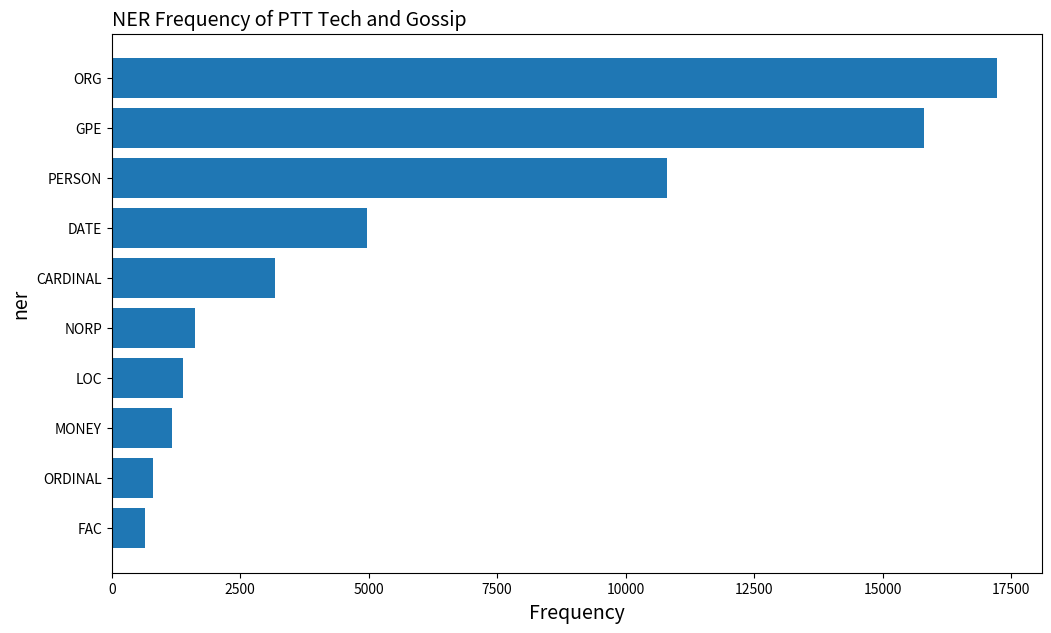

In [ ]:
ner = ner_count['ner']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(ner, count)
ax.invert_yaxis()
ax.set_title('NER Frequency of PTT Tech and Gossip',loc ='left', size = 14)
ax.set_ylabel('ner', size = 14)
ax.set_xlabel('Frequency', size = 14)
fig.show()

## 涉及到的組織(ORG)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


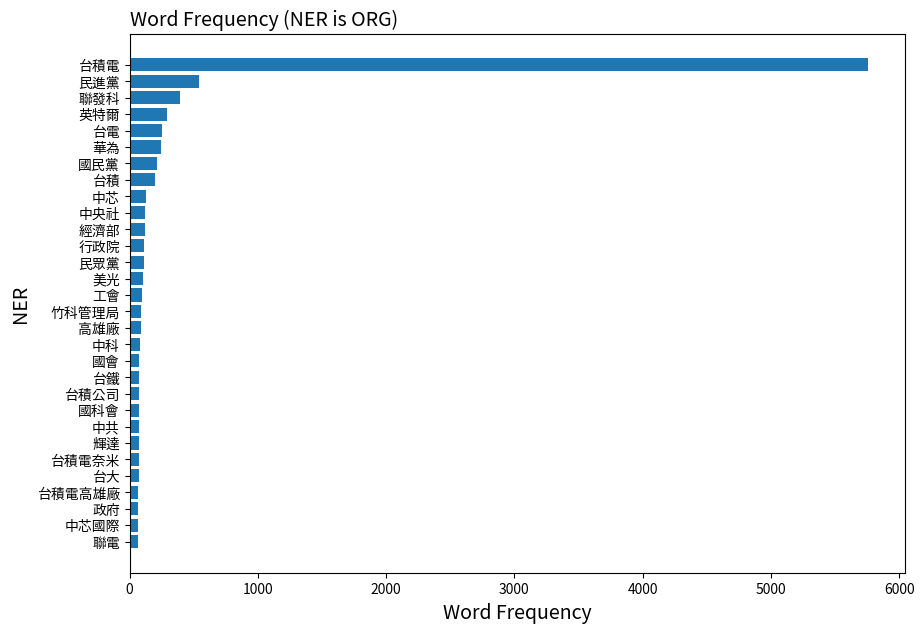

In [ ]:
# 篩選ner為ORG的資料
l_noun = ["ORG"]
ORG = entity_table[entity_table.ner.isin(l_noun)]

# # 計算每個名詞提到的次數，選出前10個
ner_count = ORG.groupby('word')['word'].agg(['count'])
ner_count = ner_count.sort_values(['count'],ascending=False)['count'].nlargest(30).reset_index()
ner_count

# 設定中文字形
matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')
word = ner_count['word']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(10, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (NER is ORG)',loc ='left', size = 14)
ax.set_ylabel('NER', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

* 原本是要看ORG排行榜是否就是我們要分析的五大企業，但結果並非如此
* 不過沒關係，最後畫出網絡圖的時候還是需要透過NER分析的結果來畫圖

## 下面找出五大公司分別的相關文章，與後續情緒分析一起做探索

* 「TSMC」相關文章

In [ ]:
keyword_list = ['台積電']
TSMC_selected = df[df['artContent'].str.contains('|'.join(keyword_list),regex=True)]
print(f"{' '.join(keyword_list)}：{TSMC_selected.shape[0]}篇相關貼文")
TSMC_selected.head(3)

台積電：2159篇相關貼文


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


system_id                                             artUrl  \
2          3  https://www.ptt.cc/bbs/Gossiping/M.1688150076....   
3          4  https://www.ptt.cc/bbs/Gossiping/M.1688171873....   
4          5  https://www.ptt.cc/bbs/Gossiping/M.1688173592....   

                 artTitle              artDate  artPoster artCatagory  \
2     Re:[問卦]荷蘭艾司摩爾為啥這麼強？  2023-07-01 02:34:34  meblessme   Gossiping   
3   [問卦]台大電機系的學生說唸物理只能要飯？  2023-07-01 08:37:51    Qunnine   Gossiping   
4  [新聞]半導體競爭力隱憂！國內綠電不足，台積  2023-07-01 09:06:30    DANANPA   Gossiping   

                                          artContent  \
2  荷蘭沒有on call, 沒有高工時，沒有996 沒有低薪\n就是家歐洲公司\n不用賣新鮮肝...   
3  前陣子經過公館啦！\n\n應該是電機系的學生\n\nA：我覺得你碩班還是唸電機的好\n\n跑...   
4  1.媒體來源: 科技新報\n\n2.記者署名: 林妤柔\n\n3.完整新聞標題:\n半導體競...   

                                          artComment            e_ip  \
2  [{"cmtStatus": "→", "cmtPoster": "showwin", "c...   42.73.130.239   
3  [{"cmtStatus": "噓", "cmtPoster": "railman", "c...  118.167.19.120   
4  [{"cmtStatus": "→", "cmtPoster": "s820912gmail...   106.64.160.11   

          insertedDate dataSource  
2  2023-07-02 01:33:04        ptt  
3  2023-07-02 01:33:45        ptt  
4  2023-07-02 01:34:00        ptt

* 「艾司摩爾」相關文章



In [ ]:
keyword_list2 = ['艾司摩爾','ASML']
ASML_selected = df[df['artContent'].str.contains('|'.join(keyword_list2),regex=True)]
print(f"{' '.join(keyword_list2)}：{ASML_selected.shape[0]}篇相關貼文")
ASML_selected.head(31)

艾司摩爾 ASML：53篇相關貼文


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


system_id                                             artUrl  \
0             1  https://www.ptt.cc/bbs/Gossiping/M.1688140859....   
1             2  https://www.ptt.cc/bbs/Gossiping/M.1688148966....   
4             5  https://www.ptt.cc/bbs/Gossiping/M.1688173592....   
6             7  https://www.ptt.cc/bbs/Gossiping/M.1688176633....   
18           19  https://www.ptt.cc/bbs/Gossiping/M.1688293591....   
116         117  https://www.ptt.cc/bbs/Gossiping/M.1689310639....   
510         511  https://www.ptt.cc/bbs/Gossiping/M.1691128735....   
786         787  https://www.ptt.cc/bbs/Gossiping/M.1693963102....   
788         789  https://www.ptt.cc/bbs/Gossiping/M.1693966999....   
791         792  https://www.ptt.cc/bbs/Gossiping/M.1693970411....   
793         794  https://www.ptt.cc/bbs/Gossiping/M.1694001531....   
821         822  https://www.ptt.cc/bbs/Gossiping/M.1694246334....   
823         824  https://www.ptt.cc/bbs/Gossiping/M.1694254795....   
838         839  https://www.ptt.cc/bbs/Gossiping/M.1694400077....   
926         927  https://www.ptt.cc/bbs/Gossiping/M.1695087883....   
1042       1043  https://www.ptt.cc/bbs/Gossiping/M.1695871860....   
1050       1051  https://www.ptt.cc/bbs/Gossiping/M.1695922094....   
1059       1060  https://www.ptt.cc/bbs/Gossiping/M.1696043638....   
1087       1088  https://www.ptt.cc/bbs/Gossiping/M.1696343388....   
1092       1093  https://www.ptt.cc/bbs/Gossiping/M.1696386020....   
1189       1190  https://www.ptt.cc/bbs/Gossiping/M.1697284306....   
1256       1257  https://www.ptt.cc/bbs/Gossiping/M.1697534372....   
1344       1345  https://www.ptt.cc/bbs/Gossiping/M.1697713235....   
1349       1350  https://www.ptt.cc/bbs/Gossiping/M.1697722786....   
1418       1419  https://www.ptt.cc/bbs/Gossiping/M.1698211091....   
1424       1425  https://www.ptt.cc/bbs/Gossiping/M.1698231185....   
1444       1445  https://www.ptt.cc/bbs/Gossiping/M.1698383880....   
1453       1454  https://www.ptt.cc/bbs/Gossiping/M.1698425586....   
1457       1458  https://www.ptt.cc/bbs/Gossiping/M.1698464892....   
1720       1721  https://www.ptt.cc/bbs/Gossiping/M.1701083758....   
1840       1841  https://www.ptt.cc/bbs/Gossiping/M.1702447654....   

                        artTitle              artDate     artPoster  \
0       [新聞]美國、荷蘭揮組合拳痛擊中國晶片商SMIC  2023-07-01 00:00:55        ttucse   
1               [問卦]荷蘭艾司摩爾為啥這麼強？  2023-07-01 02:16:03   lonzoball02   
4         [新聞]半導體競爭力隱憂！國內綠電不足，台積  2023-07-01 09:06:30       DANANPA   
6            Re:[問卦]荷蘭艾司摩爾為啥這麼強？  2023-07-01 09:57:11        caelum   
18     [新聞]荷蘭宣布限制DUV光刻機對中國出口新規則9  2023-07-02 18:26:28        pooznn   
116              [問卦]科技業的好日子結束了嗎  2023-07-14 12:57:17       Qoo2222   
510      [新聞]柯文哲稱「南部生活慘」高雄民眾不認同　  2023-08-04 13:58:52       usokami   
786      [新聞]不只華為手機！他揭大陸這些產業將勢不可  2023-09-06 09:18:19        xamous   
788       [新聞]拜登嚇慘了？華為1千天無晶片可用新機  2023-09-06 10:23:16      DreamYeh   
791    Re:[新聞]彭博權威拆解證實華為新手機晶片是中芯  2023-09-06 11:20:05      ilyj2012   
793    [新聞]買不到EUV！中芯7奈米如何助攻華為？台積  2023-09-06 19:58:47   peterlin495   
821         [問卦]ASML的CEO跟中國認輸了==  2023-09-09 15:58:52      ggian123   
823     [新聞]孤立大陸沒好處！ASML執行長認了「西方  2023-09-09 18:19:52        morgen   
838         [新聞]ASML：孤立中國會害到西方自己  2023-09-11 10:41:15     patrick08   
926      [新聞]華為2關鍵突破封鎖！退將揭7奈米晶片後  2023-09-19 09:44:40        morgen   
1042    [新聞]郭明錤：ASML可能降EUV明年出貨預估  2023-09-28 11:30:56        seysem   
1050   [新聞]新品會避談Mate60Pro華為智慧型手機  2023-09-29 01:28:11       adagiox   
1059     [新聞]華為產業鏈集體復活！郭正亮揭這3國急了  2023-09-30 11:13:56        xamous   
1087  [新聞]日研究機構：華為Mate60使用14奈米晶片  2023-10-03 22:29:45  cityhunter04   
1092      Fw:[新聞]讓共產黨死在自己的集體經濟手裡  2023-10-04 10:20:19         jacid   
1189      [新聞]蔡英文：我們生產全世界一半以上半導體  2023-10-14 19:51:44  ptt987654321   
1256      Re:[問卦]一個台積電還不如十個捷安特吧?  2023-10-17 17:19:30           psw   
1344    [新聞]ASML光刻機再受出口管制挫中共芯片野心  2023-10-19 19:00:32          eeth   
1349      [新聞]成功爭取台積電台南設廠賴清德當時說了  2023-10-19 21:39:44   Napol

* 「美光」相關文章

In [ ]:
keyword_list3 = ['美光']
MU_selected = df[df['artContent'].str.contains('|'.join(keyword_list3),regex=True)]
print(f"{' '.join(keyword_list3)}：{MU_selected.shape[0]}篇相關貼文")
MU_selected.head(3)

美光：25篇相關貼文


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


system_id                                             artUrl  \
97           98  https://www.ptt.cc/bbs/Gossiping/M.1689072802....   
987         988  https://www.ptt.cc/bbs/Gossiping/M.1695475670....   
1024       1025  https://www.ptt.cc/bbs/Gossiping/M.1695731774....   

                      artTitle              artDate     artPoster artCatagory  \
97    [新聞]台積電四位副總上月買進自家股票　共增?1  2023-07-11 18:53:20       THEHELY   Gossiping   
987   [新聞]才22天…科學園區50公司裁員共222人  2023-09-23 21:27:48   peterlin495   Gossiping   
1024      Re:[問卦]幾奈米的晶圓到底是什麼意思  2023-09-26 20:36:12  moonblacktea   Gossiping   

                                             artContent  \
97    Ettoday 新聞雲\n\n2.記者署名:\n記者高兆麟／綜合報導\n\n3.完整新聞標題...   
987   備註請放最後面 違者新聞文章刪除\n\n1.媒體來源:\n聯合\n\n2.記者署名:\n李泠...   
1024  首先要知道這種命名方式是用於邏輯電路\n其他的MEMS沒人做那麼小的\n記憶體也有他們自己的...   

                                             artComment            e_ip  \
97    [{"cmtStatus": "推", "cmtPoster": "kcclasaki", ...  125.228.199.51   
987   [{"cmtStatus": "→", "cmtPoster": "joumay", "cm...  36.226.207.148   
1024  [{"cmtStatus": "→", "cmtPoster": "james732", "...  60.245.103.196   

             insertedDate dataSource  
97    2023-07-12 01:45:35        ptt  
987   2023-09-24 01:40:41        ptt  
1024  2023-09-27 01:37:19        ptt

* 「聯發科」相關文章

In [ ]:
keyword_list4 = ['聯發科']
MTK_selected = df[df['artContent'].str.contains('|'.join(keyword_list4),regex=True)]
print(f"{' '.join(keyword_list4)}：{MTK_selected.shape[0]}篇相關貼文")
MTK_selected.head(3)

聯發科：207篇相關貼文


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


system_id                                             artUrl  \
29         30  https://www.ptt.cc/bbs/Gossiping/M.1688387410....   
57         58  https://www.ptt.cc/bbs/Gossiping/M.1688649591....   
80         81  https://www.ptt.cc/bbs/Gossiping/M.1688921739....   

                      artTitle              artDate  artPoster artCatagory  \
29     [新聞]上市公司「非主管薪資」出爐！台積電僅排  2023-07-03 20:30:08  bbbb25487   Gossiping   
57  [新聞]2022員工薪資中位數長榮海運超越聯發科奪冠  2023-07-06 21:19:49     ccugoo   Gossiping   
80        Re:[問卦]寫程式是非常輕鬆的工作吧?  2023-07-10 00:55:37   YAYA6655   Gossiping   

                                           artContent  \
29  上市公司「非主管薪資」出爐！台積電僅排第7　冠軍年薪486.7萬\n\nETtoday新聞雲...   
57  備註請放最後面 違者新聞文章刪除\n\n1.媒體來源:\n公視\n\n2.記者署名:\n吳雅...   
80  我也希望自己的小孩以後去當高級碼農\n\n目標鎖定在聯永聯發科這種的，聯永一年一千萬，聯發科...   

                                           artComment             e_ip  \
29  [{"cmtStatus": "噓", "cmtPoster": "Roooz", "cmt...  101.139.116.228   
57  [{"cmtStatus": "噓", "cmtPoster": "psy792", "cm...   140.112.48.145   
80  [{"cmtStatus": "→", "cmtPoster": "freeclouds",...  220.132.139.226   

           insertedDate dataSource  
29  2023-07-04 01:36:32        ptt  
57  2023-07-07 01:42:03        ptt  
80  2023-07-10 01:43:43        ptt

* 「群聯電子」相關文章

In [ ]:
keyword_list5 = ['群聯','群聯電子']
PEC_selected = df[df['artContent'].str.contains('|'.join(keyword_list5),regex=True)]
print(f"{' '.join(keyword_list5)}：{PEC_selected.shape[0]}篇相關貼文")
PEC_selected.head(3)

群聯 群聯電子：9篇相關貼文


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


system_id                                             artUrl  \
667         668  https://www.ptt.cc/bbs/Gossiping/M.1691716793....   
1130       1131  https://www.ptt.cc/bbs/Gossiping/M.1696758964....   
1993       1994  https://www.ptt.cc/bbs/Gossiping/M.1703943682....   

                            artTitle              artDate     artPoster  \
667           [問卦]身邊真沒幾個領低於5.7萬鄉民不信？  2023-08-11 09:19:50   kingfsg7326   
1130  [新聞]新竹房價狂噴　薪資又縮水！他嘆「8年級工程師超慘」：  2023-10-08 17:56:02        ccugoo   
1993             [新聞]外資逆轉秀全年爆買2,755億  2023-12-30 21:41:19  vodkalime607   

     artCatagory                                         artContent  \
667    Gossiping  如題\n\n小弟國高中同學都沒聯絡所以不清楚\n\n但大學以來的同學真的沒遇過幾個低於5.7...   
1130   Gossiping  備註請放最後面 違者新聞文章刪除\n\n1.媒體來源:\nETtoday\n\n2.記者署名...   
1993   Gossiping  備註請放最後面 違者新聞文章刪除\n\n1.媒體來源:\n\n經濟日報\n\n2.記者署名:...   

                                             artComment            e_ip  \
667   [{"cmtStatus": "推", "cmtPoster": "h2243398", "...  110.30.104.228   
1130  [{"cmtStatus": "噓", "cmtPoster": "Roooz", "cmt...  140.112.48.145   
1993  [{"cmtStatus": "推", "cmtPoster": "JT0624", "cm...  111.243.217.86   

             insertedDate dataSource  
667   2023-08-12 01:37:40        ptt  
1130  2023-10-09 01:34:06        ptt  
1993  2023-12-31 01:38:37        ptt

## 利用SnowNLP進行情緒分析


+ SnowNLP 針對中文設計，可以提取句子的情緒分類
+ 使用文件分類法，套件已預先用文集訓練模型以判斷情緒
+ 情緒值在 0~1之間，代表負面到正面

匯入先前的斷句資料

In [ ]:
sentence_table = pd.read_csv("./raw_data/sentence_table_techjob.csv") #匯資料
sentence_table

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


system_id                                           sentence
0              1                                 美國荷蘭揮組合拳痛擊中國晶片商遭盯上
1              1                                                ///
2              1                                                 //
3              1                                          新聞記者郭妍希報導
4              1  美國荷蘭預料今年夏季將接連揮拳重擊中國晶片商，進步限制晶片製造設備出口，以免先進科技遭北京用...
...          ...                                                ...
59516       2491                             進行選舉分析，比起自己選舉，我覺得分析比較好
59517       2491             談到手催生的熊本熊，蒲島說，由於熊本熊幾乎受到全體縣民的喜愛，相關商品銷售額
59518       2491                    累計高達約兆億日圓約新台幣億元，希望下任知事能讓更多人喜歡熊本
59519       2491                                           熊及擴大活動範圍
59520       2491                                                ///

[59521 rows x 2 columns]

In [ ]:
#情緒分析函式
def get_sentiment(sent):
    s = SnowNLP(sent)
    return s.sentiments


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 台積電

使用「台積電」相關文章，看看台積電相關文章的情緒表現。

In [ ]:
#首先將句子和日期合併，方便之後做分析
sentiment_date = pd.merge(sentence_table,TSMC_selected[['system_id','artDate','dataSource']],on='system_id',how='left').dropna()
sentiment_date.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


system_id           sentence              artDate dataSource
29          3  荷蘭沒有,沒有高工時，沒有沒有低薪  2023-07-01 02:34:34        ptt
30          3            就是家歐洲公司  2023-07-01 02:34:34        ptt
31          3  不用賣新鮮肝，不用過著不像人的生活  2023-07-01 02:34:34        ptt

* 將句子打上情緒分數(台積電)

In [ ]:
# 幫每句話加上情緒分數
sentiment_date['sentimentValue'] = sentiment_date.apply(lambda row : get_sentiment(row['sentence'],), axis = 1)
sentiment_date.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


system_id           sentence              artDate dataSource  \
29          3  荷蘭沒有,沒有高工時，沒有沒有低薪  2023-07-01 02:34:34        ptt   
30          3            就是家歐洲公司  2023-07-01 02:34:34        ptt   
31          3  不用賣新鮮肝，不用過著不像人的生活  2023-07-01 02:34:34        ptt   

    sentimentValue  
29        0.309050  
30        0.433817  
31        0.699515

#### 情緒分佈和盒狀圖(台積電)

In [ ]:
# 看一下情緒的分布
sentiment_date['sentimentValue'].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    5.452800e+04
mean     4.046654e-01
std      3.301145e-01
min      3.183009e-12
25%      8.785807e-02
50%      3.507252e-01
75%      6.795944e-01
max      1.000000e+00
Name: sentimentValue, dtype: float64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

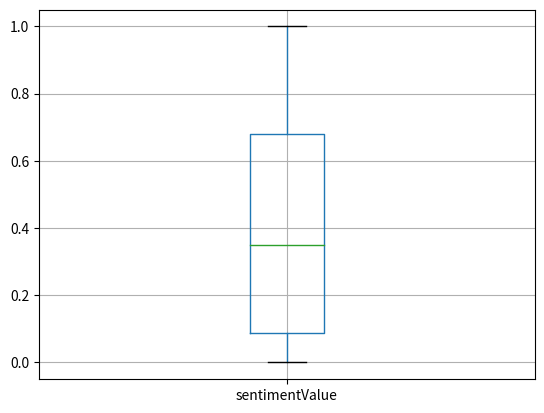

In [ ]:
# 情緒分布的盒狀圖
boxplot = sentiment_date.boxplot(column=['sentimentValue'], showfliers=False)
boxplot

#### 平均情緒分數趨勢(台積電)

In [ ]:
#將每個月的情緒分數取平均，並轉換時間格式為年月(台積電)

sent_date = sentiment_date.copy()
sent_date['artDate'] =  pd.to_datetime(sentiment_date['artDate']).dt.to_period('M')

sentiment_count = sent_date.groupby(['artDate'])['sentimentValue'].mean().reset_index()
sentiment_count

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


artDate  sentimentValue
0  2023-07        0.413136
1  2023-08        0.398797
2  2023-09        0.407841
3  2023-10        0.404430
4  2023-11        0.402963
5  2023-12        0.398913

* 台積電平均情緒分數時間趨勢

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-32-dcb5938f94ff>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


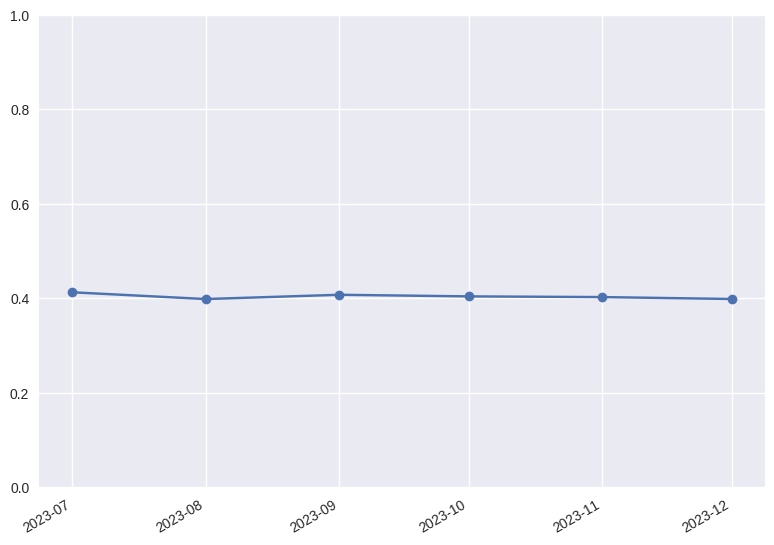

In [ ]:
# 平均情緒分數時間趨勢
months = [period.to_timestamp() for period in sentiment_count['artDate']]   # 將 PeriodIndex 中的每個 Period 物件轉換為對應的 datetime 物件
y = sentiment_count['sentimentValue']

plt.style.use('seaborn')

plt.plot_date(months, y, linestyle='solid')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.ylim(0, 1)

plt.show()

從上圖中發現大部分天數的平均情緒分數都在0.4左右，偏向中性，並無太大的趨勢起伏。

#### 詞彙探索(台積電)

從上圖的情緒分數取平均中選取分數較高的月份(7月)來看當月的正向句子皆為哪些，並且這些句子都用了哪些詞彙。

In [ ]:
# 篩時間
filter_sentiment = sent_date[sent_date['artDate']=='2023-7']
filter_sentiment = filter_sentiment.loc[filter_sentiment['sentimentValue'] > 0.7]

filter_sentiment.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


system_id       sentence  artDate dataSource  sentimentValue
32          3      為什麼艾斯摩爾可以  2023-07        ptt        0.972536
33          3  台積電就定得賣肝才能這麼強  2023-07        ptt        0.710894
39          4     我真的很喜歡理論物理  2023-07        ptt        0.716987
42          4   真的喜歡，自己在家念就好  2023-07        ptt        0.968996
48          5       媒體來源科技新報  2023-07        ptt        0.716853

In [ ]:
# 把時間分數和之前斷詞的 token table 做 join
pos_words = pd.merge(filter_sentiment,pos_table,on='system_id',how='left')
pos_words = pos_words[['system_id','sentimentValue','word']]

# 篩選掉只有單個字元的結果
pos_words = pos_words[pos_words.apply(lambda x: len(x['word'])>1, axis=1)]
pos_words.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


system_id  sentimentValue word
0          3        0.972536   荷蘭
1          3        0.972536   沒有
3          3        0.972536   沒有
4          3        0.972536   高工
7          3        0.972536   沒有

### 艾司摩爾

* 使用「艾司摩爾」相關文章，看看艾斯摩爾相關文章的情緒表現





In [ ]:
#首先將句子和日期合併，方便之後做分析
sentiment_date2 = pd.merge(sentence_table,ASML_selected[['system_id','artDate','dataSource']],on='system_id',how='left').dropna()
sentiment_date2.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


system_id            sentence              artDate dataSource
0          1  美國荷蘭揮組合拳痛擊中國晶片商遭盯上  2023-07-01 00:00:55        ptt
1          1                 ///  2023-07-01 00:00:55        ptt
2          1                  //  2023-07-01 00:00:55        ptt

* 將句子打上情緒分數(艾司摩爾)

In [ ]:
# 幫每句話加上情緒分數
sentiment_date2['sentimentValue'] = sentiment_date2.apply(lambda row : get_sentiment(row['sentence'],), axis = 1)
sentiment_date2.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


system_id            sentence              artDate dataSource  \
0          1  美國荷蘭揮組合拳痛擊中國晶片商遭盯上  2023-07-01 00:00:55        ptt   
1          1                 ///  2023-07-01 00:00:55        ptt   
2          1                  //  2023-07-01 00:00:55        ptt   

   sentimentValue  
0        0.999215  
1        0.250000  
2        0.200000

#### 情緒分佈和盒狀圖(艾司摩爾)

In [ ]:
# 看一下情緒的分布
sentiment_date2['sentimentValue'].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    1936.000000
mean        0.462273
std         0.351195
min         0.000001
25%         0.101118
50%         0.477883
75%         0.793404
max         1.000000
Name: sentimentValue, dtype: float64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

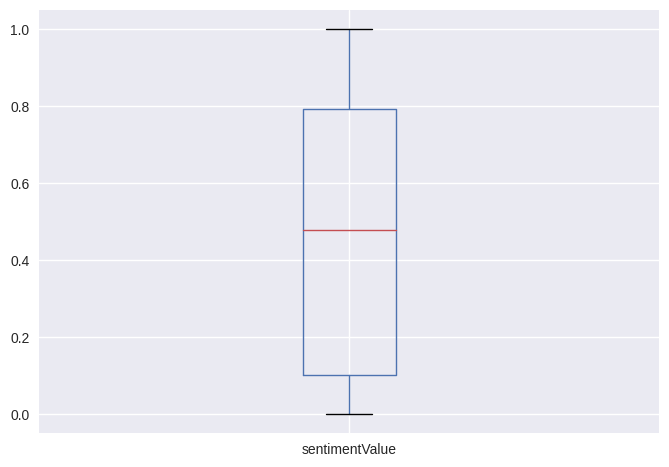

In [ ]:
# 情緒分布的盒狀圖
boxplot2 = sentiment_date2.boxplot(column=['sentimentValue'], showfliers=False)
boxplot2

#### 平均情緒分數趨勢(艾司摩爾)

In [ ]:
#將每個月的情緒分數取平均，並轉換時間格式為年月(艾司摩爾)

sent_date2 = sentiment_date2.copy()
sent_date2['artDate'] =  pd.to_datetime(sentiment_date2['artDate']).dt.to_period('M')

sentiment_count2 = sent_date2.groupby(['artDate'])['sentimentValue'].mean().reset_index()
sentiment_count2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


artDate  sentimentValue
0  2023-07        0.482551
1  2023-08        0.463025
2  2023-09        0.436045
3  2023-10        0.463275
4  2023-11        0.423644
5  2023-12        0.509041

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-40-b5643b66ee22>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


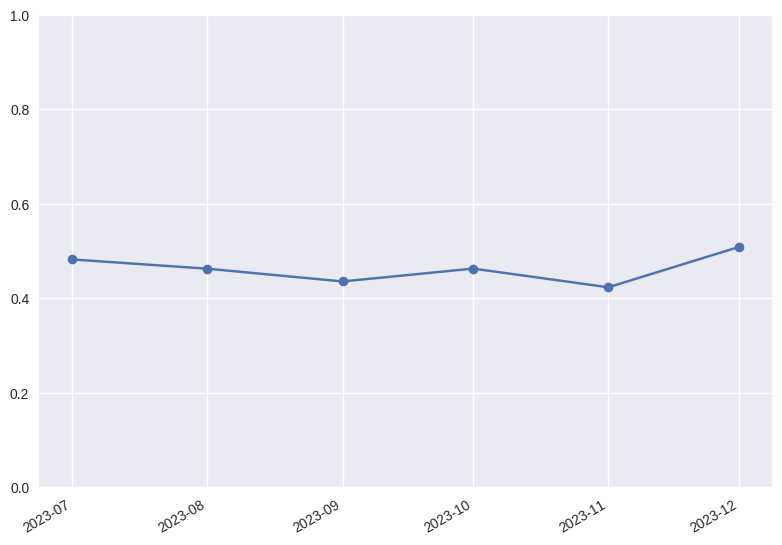

In [ ]:
# 平均情緒分數時間趨勢
months2 = [period.to_timestamp() for period in sentiment_count2['artDate']]   # 將 PeriodIndex 中的每個 Period 物件轉換為對應的 datetime 物件
y2 = sentiment_count2['sentimentValue']

plt.style.use('seaborn')

plt.plot_date(months2, y2, linestyle='solid')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.ylim(0, 1)

plt.show()

可以看到跟艾司摩爾相關的文章情緒分數普遍也是落在0.4和0.5之間，10月的情緒分數相較前後的9月和11月還要高，然後在12月到了最高。

#### 詞彙探索(艾司摩爾)

從上圖的情緒分數取平均中選取分數較高的月份(12月)來看當月的正向句子皆為哪些，並且這些句子都用了哪些詞彙。

In [ ]:
# 篩時間
filter_sentiment2 = sent_date2[sent_date2['artDate']=='2023-12']
filter_sentiment2 = filter_sentiment2.loc[filter_sentiment2['sentimentValue'] > 0.7]

filter_sentiment2.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


system_id                                 sentence  artDate dataSource  \
39832       1841                     三星合資億美元南韓設新廠研發先進加工技術  2023-12        ptt   
39834       1841         荷蘭半導體製造設備大廠艾司摩爾將與南韓三星電子共同投資兆韓元億美  2023-12        ptt   
39835       1841                  元在南韓建立座工廠，專事研發半導體先進加工技術  2023-12        ptt   
39838       1841    彭博資訊指出，艾司摩爾與三星的合作案，緊隨在南韓與荷蘭兩國的外交交流後宣布  2023-12        ptt   
39840       1841  工廠擴大了艾司摩爾在南韓的布局，艾司摩爾目前在南韓已有四家工廠，為包括三星在內  2023-12        ptt   

       sentimentValue  
39832        0.982789  
39834        0.932293  
39835        0.919237  
39838        0.997399  
39840        0.998934

In [ ]:
# 把時間分數和之前斷詞的 token table 做 join
pos_words2 = pd.merge(filter_sentiment2,pos_table,on='system_id',how='left')
pos_words2 = pos_words2[['system_id','sentimentValue','word']]

# 篩選掉只有單個字元的結果
pos_words2 = pos_words2[pos_words2.apply(lambda x: len(x['word'])>1, axis=1)]
pos_words2.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


system_id  sentimentValue  word
0       1841        0.982789    媒體
1       1841        0.982789    來源
2       1841        0.982789  經濟日報
3       1841        0.982789    記者
4       1841        0.982789    署名

### 美光

使用「美光」相關文章，看看美光相關文章的情緒表現。<br>


In [ ]:
#首先將句子和日期合併，方便之後做分析
sentiment_date3 = pd.merge(sentence_table,MU_selected[['system_id','artDate','dataSource']],on='system_id',how='left').dropna()
sentiment_date3.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


system_id   sentence              artDate dataSource
2362         98        新聞雲  2023-07-11 18:53:20        ptt
2363         98       記者署名  2023-07-11 18:53:20        ptt
2364         98  記者高兆麟綜合報導  2023-07-11 18:53:20        ptt

將句子打上情緒分數(美光)

In [ ]:
# 幫每句話加上情緒分數
sentiment_date3['sentimentValue'] = sentiment_date3.apply(lambda row : get_sentiment(row['sentence'],), axis = 1)
sentiment_date3.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


system_id   sentence              artDate dataSource  sentimentValue
2362         98        新聞雲  2023-07-11 18:53:20        ptt        0.596740
2363         98       記者署名  2023-07-11 18:53:20        ptt        0.729795
2364         98  記者高兆麟綜合報導  2023-07-11 18:53:20        ptt        0.382211

#### 情緒分佈和盒狀圖(美光)

In [ ]:
# 看一下情緒的分布
sentiment_date3['sentimentValue'].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    882.000000
mean       0.364554
std        0.325895
min        0.000002
25%        0.053008
50%        0.270000
75%        0.608855
max        0.999581
Name: sentimentValue, dtype: float64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

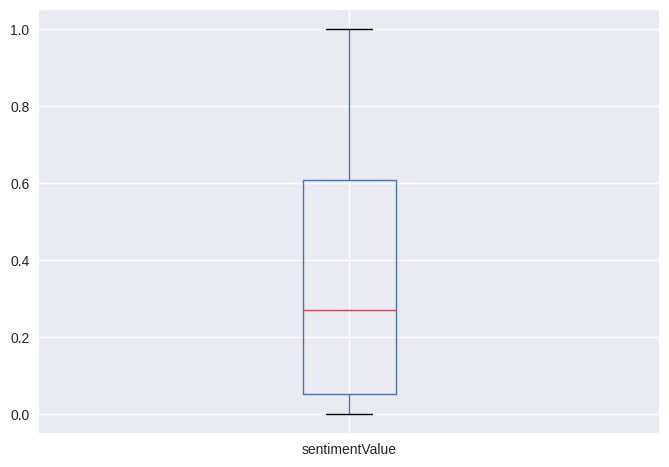

In [ ]:
# 情緒分布的盒狀圖
boxplot3 = sentiment_date3.boxplot(column=['sentimentValue'], showfliers=False)
boxplot3

#### 平均情緒分數趨勢(美光)

In [ ]:
#將每個月的情緒分數取平均，並轉換時間格式為年月(美光)

sent_date3 = sentiment_date3.copy()
sent_date3['artDate'] =  pd.to_datetime(sentiment_date3['artDate']).dt.to_period('M')

sentiment_count3 = sent_date3.groupby(['artDate'])['sentimentValue'].mean().reset_index()
sentiment_count3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


artDate  sentimentValue
0  2023-07        0.308621
1  2023-09        0.356315
2  2023-10        0.349155
3  2023-11        0.404217
4  2023-12        0.422234

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-48-4ed22ab722db>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


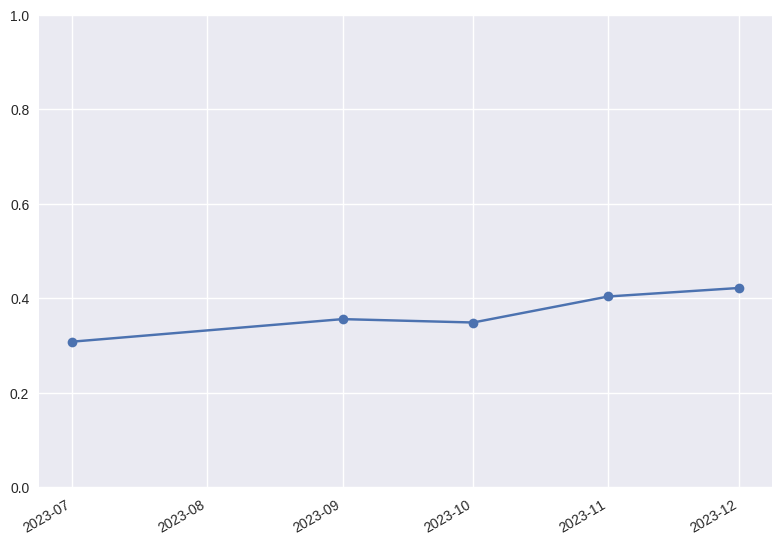

In [ ]:
# 平均情緒分數時間趨勢
months3 = [period.to_timestamp() for period in sentiment_count3['artDate']]   # 將 PeriodIndex 中的每個 Period 物件轉換為對應的 datetime 物件
y3 = sentiment_count3['sentimentValue']

plt.style.use('seaborn')

plt.plot_date(months3, y3, linestyle='solid')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.ylim(0, 1)

plt.show()

美光的部份，由於相關文章量較少，所以8月的部分可能沒有與其相關文章故沒有顯示出在八月的位置，但可以看出情緒分數越來越往上的趨勢。

#### 詞彙探索(美光)

從上圖的情緒分數取平均中選取分數較高的月份(12月)來看當月的正向句子皆為哪些，並且這些句子都用了哪些詞彙。

In [ ]:
# 篩時間
filter_sentiment3 = sent_date3[sent_date3['artDate']=='2023-12']
filter_sentiment3 = filter_sentiment3.loc[filter_sentiment3['sentimentValue'] > 0.7]

filter_sentiment3.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


system_id                          sentence  artDate dataSource  \
56576       2399                 這種做法類似美國晶片法案的補貼做法  2023-12        ptt   
56579       2399  防止關鍵技術意外洩露給日本以外的公司或國家，將高價值技術留在日本  2023-12        ptt   
56587       2399                   此對技術進步的保護力度越來越大  2023-12        ptt   
56590       2399           至於日本限制會如何影響這些公司在該國的營運，特  2023-12        ptt   
56591       2399                     別是在研發領域，仍有待觀察  2023-12        ptt   

       sentimentValue  
56576        0.738849  
56579        0.998847  
56587        0.918823  
56590        0.994389  
56591        0.963239

In [ ]:
# 把時間分數和之前斷詞的 token table 做 join
pos_words3 = pd.merge(filter_sentiment3,pos_table,on='system_id',how='left')
pos_words3 = pos_words3[['system_id','sentimentValue','word']]

# 篩選掉只有單個字元的結果
pos_words3 = pos_words3[pos_words3.apply(lambda x: len(x['word'])>1, axis=1)]
pos_words3.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


system_id  sentimentValue word
1       2399        0.738849   要求
3       2399        0.738849   晶片
4       2399        0.738849   補助
6       2399        0.738849   旗下
7       2399        0.738849   員工

### 聯發科

使用「聯發科」相關文章，看看聯發科相關文章的情緒表現。<br>


In [ ]:
#首先將句子和日期合併，方便之後做分析
sentiment_date4 = pd.merge(sentence_table,MTK_selected[['system_id','artDate','dataSource']],on='system_id',how='left').dropna()
sentiment_date4.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


system_id     sentence              artDate dataSource
699         30  上市公司非主管薪資出爐  2023-07-03 20:30:08        ptt
700         30  台積電僅排第冠軍年薪萬  2023-07-03 20:30:08        ptt
701         30          新聞雲  2023-07-03 20:30:08        ptt

將句子打上情緒分數(聯發科)

In [ ]:
# 幫每句話加上情緒分數
sentiment_date4['sentimentValue'] = sentiment_date4.apply(lambda row : get_sentiment(row['sentence'],), axis = 1)
sentiment_date4.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


system_id     sentence              artDate dataSource  sentimentValue
699         30  上市公司非主管薪資出爐  2023-07-03 20:30:08        ptt        0.569683
700         30  台積電僅排第冠軍年薪萬  2023-07-03 20:30:08        ptt        0.235121
701         30          新聞雲  2023-07-03 20:30:08        ptt        0.596740

#### 情緒分佈和盒狀圖(聯發科)

In [ ]:
# 看一下情緒的分布
sentiment_date4['sentimentValue'].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    4.761000e+03
mean     4.307925e-01
std      3.346112e-01
min      1.301329e-07
25%      1.097679e-01
50%      3.880601e-01
75%      7.307692e-01
max      9.999907e-01
Name: sentimentValue, dtype: float64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

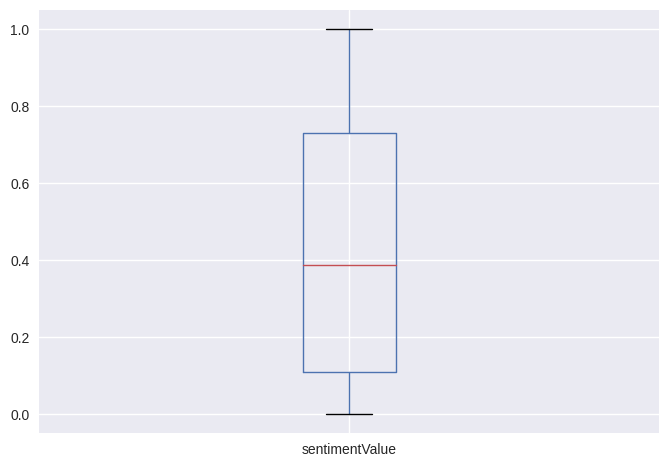

In [ ]:
# 情緒分布的盒狀圖
boxplot4 = sentiment_date4.boxplot(column=['sentimentValue'], showfliers=False)
boxplot4

#### 平均情緒分數趨勢(聯發科)

In [ ]:
#將每個月的情緒分數取平均，並轉換時間格式為年月(聯發科)

sent_date4 = sentiment_date4.copy()
sent_date4['artDate'] =  pd.to_datetime(sentiment_date4['artDate']).dt.to_period('M')

sentiment_count4 = sent_date4.groupby(['artDate'])['sentimentValue'].mean().reset_index()
sentiment_count4

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


artDate  sentimentValue
0  2023-07        0.416775
1  2023-08        0.396766
2  2023-09        0.449016
3  2023-10        0.431547
4  2023-11        0.436983
5  2023-12        0.418139

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-56-b6856b1912d1>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


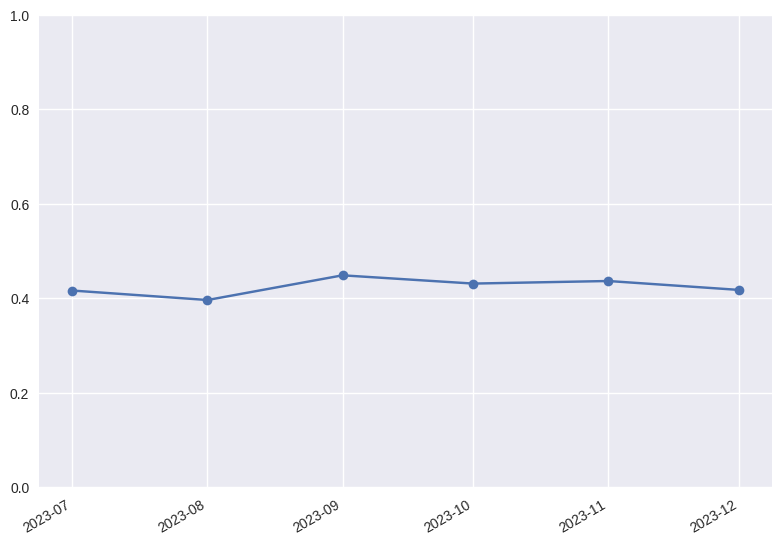

In [ ]:
# 平均情緒分數時間趨勢
months4 = [period.to_timestamp() for period in sentiment_count4['artDate']]   # 將 PeriodIndex 中的每個 Period 物件轉換為對應的 datetime 物件
y4 = sentiment_count4['sentimentValue']

plt.style.use('seaborn')

plt.plot_date(months4, y4, linestyle='solid')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.ylim(0, 1)

plt.show()

在聯發科的部分，與台積電相差無幾，可能因為企業的屬性相似並且討論的議題接近，多為中性字眼，情緒分數皆是介於0.4左右，唯一不同的是9月相較其他月份明顯較高。

#### 詞彙探索(聯發科)

從上圖的情緒分數取平均中選取分數較高的月份(9月)來看當月的正向句子皆為哪些，並且這些句子都用了哪些詞彙。

In [ ]:
# 篩時間
filter_sentiment4 = sent_date4[sent_date4['artDate']=='2023-9']
filter_sentiment4 = filter_sentiment4.loc[filter_sentiment4['sentimentValue'] > 0.7]

filter_sentiment4.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


system_id          sentence  artDate dataSource  sentimentValue
15805        788        中國現在整個產業升級  2023-09        ptt        0.855341
15806        788  在傳統的造船汽車產業開始碾壓韓國  2023-09        ptt        0.780788
15807        788      比如說中國的比亞迪電動車  2023-09        ptt        0.900218
15808        788   那麼現在在高階芯片領域彎道超車  2023-09        ptt        0.875273
15809        788    台積電未來五年內就會完全落後  2023-09        ptt        0.761539

In [ ]:
# 把時間分數和之前斷詞的 token table 做 join
pos_words4 = pd.merge(filter_sentiment4,pos_table,on='system_id',how='left')
pos_words4 = pos_words4[['system_id','sentimentValue','word']]

# 篩選掉只有單個字元的結果
pos_words4 = pos_words4[pos_words4.apply(lambda x: len(x['word'])>1, axis=1)]
pos_words4.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


system_id  sentimentValue word
2         788        0.855341   本來
5         788        0.855341   這樣
6         788        0.855341   中國
7         788        0.855341   現在
10        788        0.855341   產業

### 群聯電子

使用「群聯電子」相關文章，看看群聯電子相關文章的情緒表現。<br>


In [ ]:
# 首先將句子和日期合併，方便之後做分析
sentiment_date5 = pd.merge(sentence_table,PEC_selected[['system_id','artDate','dataSource']],on='system_id',how='left').dropna()
sentiment_date5.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


system_id            sentence              artDate dataSource
13579        668                  如題  2023-08-11 09:19:50        ptt
13580        668    小弟國高中同學都沒聯絡所以不清楚  2023-08-11 09:19:50        ptt
13581        668  但大學以來的同學真的沒遇過幾個低於萬  2023-08-11 09:19:50        ptt

將句子打上情緒分數(群聯電子)

In [ ]:
# 幫每句話加上情緒分數
sentiment_date5['sentimentValue'] = sentiment_date5.apply(lambda row : get_sentiment(row['sentence'],), axis = 1)
sentiment_date5.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


system_id            sentence              artDate dataSource  \
13579        668                  如題  2023-08-11 09:19:50        ptt   
13580        668    小弟國高中同學都沒聯絡所以不清楚  2023-08-11 09:19:50        ptt   
13581        668  但大學以來的同學真的沒遇過幾個低於萬  2023-08-11 09:19:50        ptt   

       sentimentValue  
13579        0.125000  
13580        0.584766  
13581        0.033334

#### 情緒分佈和盒狀圖(群聯電子)

In [ ]:
# 看一下情緒的分布
sentiment_date5['sentimentValue'].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    273.000000
mean       0.379128
std        0.307561
min        0.000002
25%        0.099799
50%        0.350725
75%        0.584766
max        0.999335
Name: sentimentValue, dtype: float64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

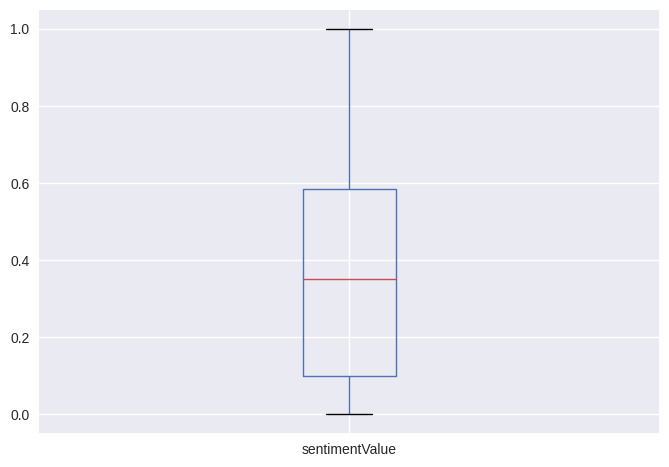

In [ ]:
# 情緒分布的盒狀圖
boxplot5 = sentiment_date5.boxplot(column=['sentimentValue'], showfliers=False)
boxplot5

#### 平均情緒分數趨勢(群聯電子)

In [ ]:
#將每個月的情緒分數取平均，並轉換時間格式為年月(群聯電子)

sent_date5 = sentiment_date5.copy()
sent_date5['artDate'] =  pd.to_datetime(sentiment_date5['artDate']).dt.to_period('M')

sentiment_count5 = sent_date5.groupby(['artDate'])['sentimentValue'].mean().reset_index()
sentiment_count5

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


artDate  sentimentValue
0  2023-07        0.259348
1  2023-08        0.378865
2  2023-10        0.495936
3  2023-12        0.378401

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-63-0fb4ae953626>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


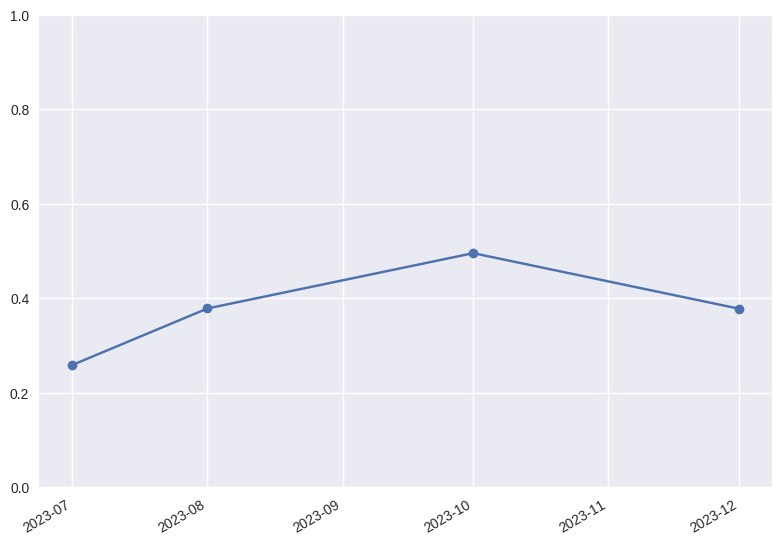

In [ ]:
# 平均情緒分數時間趨勢
months5 = [period.to_timestamp() for period in sentiment_count5['artDate']]   # 將 PeriodIndex 中的每個 Period 物件轉換為對應的 datetime 物件
y5 = sentiment_count5['sentimentValue']

plt.style.use('seaborn')

plt.plot_date(months5, y5, linestyle='solid')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.ylim(0, 1)

plt.show()

* **群聯電子跟美光的部分一樣都呈現相關文章過少的問題，所以在9和11月並無相關的文章情緒分數，但可以看到情緒分數10月明顯較高於其他月份。**

#### 詞彙探索(群聯電子)

從上圖的情緒分數取平均中選取分數較高的月份(10月)來看當月的正向句子皆為哪些，並且這些句子都用了哪些詞彙。

In [ ]:
# 篩時間
filter_sentiment5 = sent_date5[sent_date5['artDate']=='2023-10']
filter_sentiment5 = filter_sentiment5.loc[filter_sentiment5['sentimentValue'] > 0.7]

filter_sentiment5.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


system_id                                           sentence  artDate  \
23720       1131                                               記者署名  2023-10   
23721       1131                                                施怡妏  2023-10   
23727       1131                                            科技業分紅減少  2023-10   
23729       1131  竹科人是帶動新竹房市最重要的族群之，他們除了選擇關埔高鐵特區等高價地段，巨城商圈也是熱門選項...  2023-10   
23730       1131                                 原在發文，年次以後的年輕工程師有多慘  2023-10   

      dataSource  sentimentValue  
23720        ptt        0.729795  
23721        ptt        0.909802  
23727        ptt        0.942834  
23729        ptt        0.993067  
23730        ptt        0.812897

In [ ]:
# 把時間分數和之前斷詞的 token table 做 join
pos_words5 = pd.merge(filter_sentiment5,pos_table,on='system_id',how='left')
pos_words5 = pos_words5[['system_id','sentimentValue','word']]

# 篩選掉只有單個字元的結果
pos_words5 = pos_words5[pos_words5.apply(lambda x: len(x['word'])>1, axis=1)]
pos_words5.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


system_id  sentimentValue word
0       1131        0.729795   備註
3       1131        0.729795   最後
4       1131        0.729795   面違
6       1131        0.729795   新聞
7       1131        0.729795   文章

## 五間公司的正面詞彙文字雲

In [ ]:
# 自定停用字
with open('./dict/stop_words.txt') as f:
    stop_words = f.read().splitlines()

print(stop_words)

[',', '?', '、', '。', '“', '”', '《', '》', '！', '，', '：', '；', '？', '可否', '有無', '再', '本來', '是不是', '一個', '這種', '人民', '末##末', '啊', '阿', '哎', '哎呀', '哎喲', '唉', '我', '我們', '按', '按照', '依照', '吧', '吧噠', '把', '罷了', '被', '本', '本著', '比', '比方', '比如', '鄙人', '彼', '彼此', '邊', '別', '別的', '別說', '並', '並且', '不比', '不成', '不單', '不但', '不獨', '不管', '不光', '不過', '不僅', '不拘', '不論', '不怕', '不然', '不如', '不特', '不惟', '不問', '不只', '朝', '朝著', '趁', '趁著', '乘', '沖', '除', '除此之外', '除非', '除了', '此', '此間', '此外', '從', '從而', '打', '待', '但', '但是', '當', '當著', '到', '得', '的', '的話', '等', '等等', '地', '第', '叮咚', '對', '對於', '多', '多少', '而', '而況', '而且', '而是', '而外', '而言', '而已', '爾後', '反過來', '反過來說', '反之', '非但', '非徒', '否則', '嘎', '嘎登', '該', '趕', '個', '各', '各個', '各位', '各種', '各自', '給', '根據', '跟', '故', '故此', '固然', '關於', '管', '歸', '果然', '果真', '過', '哈', '哈哈', '呵', '和', '何', '何處', '何況', '何時', '嘿', '哼', '哼唷', '呼哧', '乎', '嘩', '還是', '還有', '換句話說', '換言之', '或', '或是', '或者', '極了', '及', '及其', '及至', '即', '即便', '即或', '即令', '即若', '即使', '幾', '幾時', '己', '既', '既然', '既是', 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 台積電

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


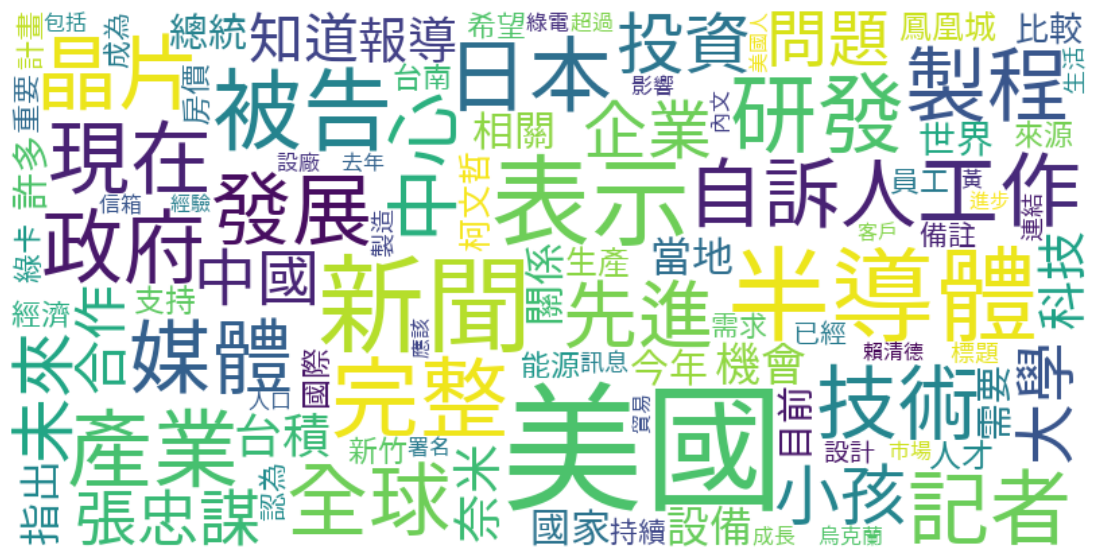

In [ ]:
# 匯入自訂的 stop words (預設只有英文的)
stop_words_pos = stop_words
stop_words_pos.extend(('時間','營業','公司','盧東暉','覺得','真的','台灣','台北','高雄','有點','完全','飯店','最少','聯發科','群聯電子','美光','艾司摩爾','ASML','台積電','訂位','最多','相當','不錯','部分','最多','提供'))
stop_words_pos = set(stop_words_pos)

# 設定中文字形
font_path = 'TaipeiSansTCBeta-Regular.ttf'

# 可以設定字型大小和背景顏色
wordcloud = WordCloud(
          stopwords=stop_words_pos,
          collocations=False,
          font_path=font_path,
          width=800,
          height = 400,
          max_words=100,
          background_color="white")

wordcloud.generate(' '.join(pos_words['word']))
# Display the generated image:
plt.figure(figsize = (14,7))
plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")
plt.show()

我們可以看到「美國」、「日本」、「晶片」、「半導體」等詞彙出現在台積電的正向文章中，可以知道大多文章對於台積電奈米晶片製造和其在半導體產業中多數有著正面的評價，也包括美國和日本的出現，可能是台積電在日本熊本和美國亞歷桑納設廠的緣故

### 艾司摩爾

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


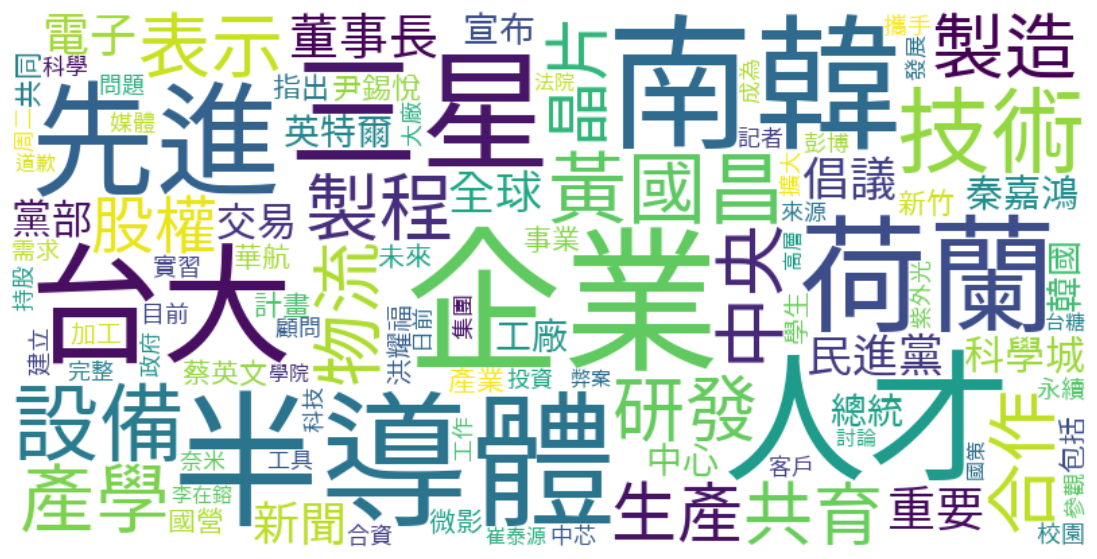

In [ ]:
# 匯入自訂的 stop words (預設只有英文的)
stop_words_pos = stop_words
stop_words_pos.extend(('時間','營業','公司','盧東暉','覺得','真的','台灣','台北','高雄','有點','完全','飯店','最少','聯發科','群聯電子','美光','艾司摩爾','ASML','台積電','訂位','最多','相當','不錯','部分','最多','提供'))
stop_words_pos = set(stop_words_pos)

# 設定中文字形
font_path = 'TaipeiSansTCBeta-Regular.ttf'

# 可以設定字型大小和背景顏色
wordcloud = WordCloud(
                stopwords=stop_words_pos,
                collocations=False,
                font_path=font_path,
                width=800,
                height = 400,
                max_words=100,
                background_color="white")

wordcloud.generate(' '.join(pos_words2['word']))
# Display the generated image:
plt.figure(figsize = (14,7))
plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")
plt.show()

艾司摩爾的部分，可以看到除了自己產業在做的「半導體」和「製程」外，正向文章出現的還有「三星」(因為其為南韓公司故「南韓」也一起出現)，其主要原因極可能是因為在2023年12月時(也是本文字雲篩選的時間區段)艾司摩爾與南韓三星共同投資7.6億美元在南韓建立新廠，專門研發半導體的先進加工技術。而台大的部分可能是其在台大有相關的徵才活動。

### 美光

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


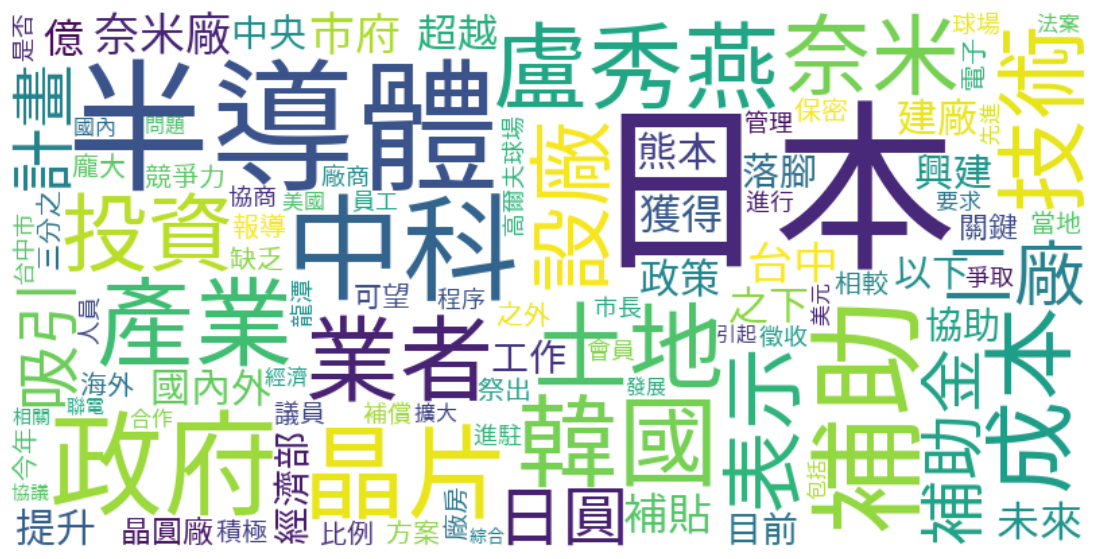

In [ ]:
# 匯入自訂的 stop words (預設只有英文的)
stop_words_pos = stop_words
stop_words_pos.extend(('時間','營業','公司','盧東暉','覺得','真的','台灣','台北','高雄','有點','完全','飯店','最少','聯發科','群聯電子','美光','艾司摩爾','ASML','台積電','訂位','最多','相當','不錯','部分','最多','提供'))
stop_words_pos = set(stop_words_pos)

# 設定中文字形
font_path = 'TaipeiSansTCBeta-Regular.ttf'

# 可以設定字型大小和背景顏色
wordcloud = WordCloud(
                stopwords=stop_words_pos,
                collocations=False,
                font_path=font_path,
                width=800,
                height = 400,
                max_words=100,
                background_color="white")

wordcloud.generate(' '.join(pos_words3['word']))
# Display the generated image:
plt.figure(figsize = (14,7))
plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")
plt.show()

美光的文字雲可以看到「日本」、「補助」、「設廠」等字眼，原因可能是日本政府在2023年宣布補助美光13美元在廣島設廠的緣故，也因為美光在2023年台中四廠的啟用，所以正向文章也可能出現台中市長「盧秀燕」的名字。

### 聯發科

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


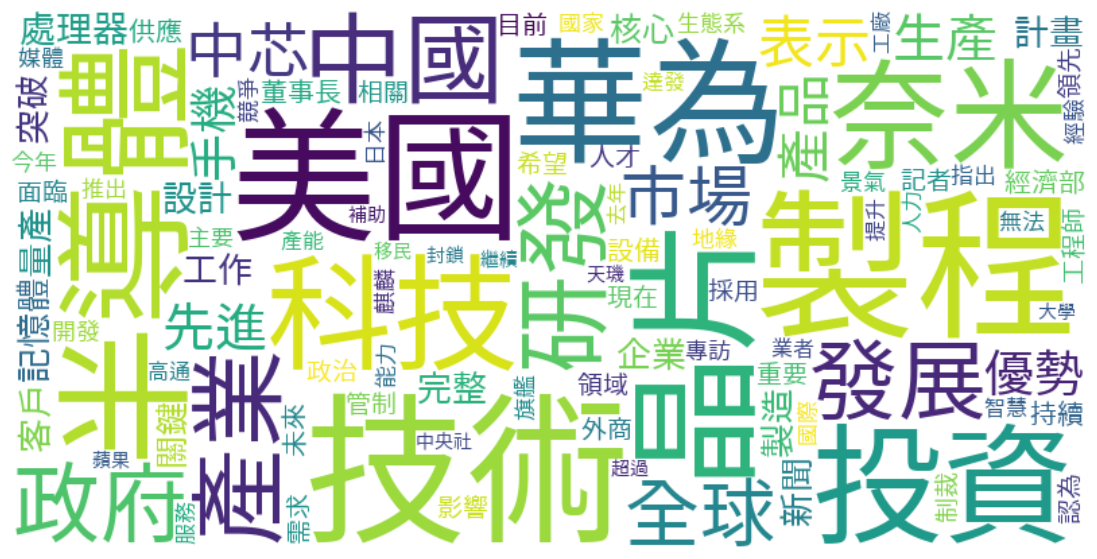

In [ ]:
# 匯入自訂的 stop words (預設只有英文的)
stop_words_pos = stop_words
stop_words_pos.extend(('時間','營業','公司','盧東暉','覺得','真的','台灣','台北','高雄','有點','完全','飯店','最少','聯發科','群聯電子','美光','艾司摩爾','ASML','台積電','訂位','最多','相當','不錯','部分','最多','提供'))
stop_words_pos = set(stop_words_pos)

# 設定中文字形
font_path = 'TaipeiSansTCBeta-Regular.ttf'

# 可以設定字型大小和背景顏色
wordcloud = WordCloud(
                stopwords=stop_words_pos,
                collocations=False,
                font_path=font_path,
                width=800,
                height = 400,
                max_words=100,
                background_color="white")

wordcloud.generate(' '.join(pos_words4['word']))
# Display the generated image:
plt.figure(figsize = (14,7))
plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")
plt.show()

而聯發科除了前述半導體產業常被提到的「半導體」和「晶片」等，還出現中國華為和「優勢」等字眼，可能是在談論到聯發科的優勢時會將其與相似的產業進行比較，之前也有提到手機處理器的文章有將兩間公司提到，而「處理器」一詞也在此文字雲中。

### 群聯電子

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


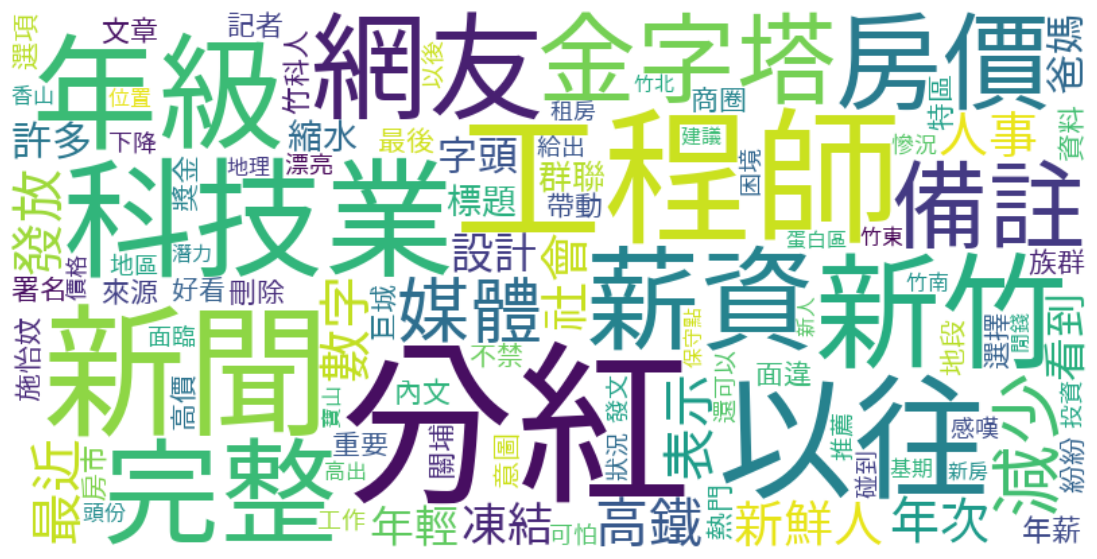

In [ ]:
# 匯入自訂的 stop words (預設只有英文的)
stop_words_pos = stop_words
stop_words_pos.extend(('時間','營業','公司','盧東暉','覺得','真的','台灣','台北','高雄','有點','完全','飯店','最少','聯發科','群聯電子','美光','艾司摩爾','超慘','ASML','台積電','訂位','最多','相當','不錯','部分','最多','提供'))
stop_words_pos = set(stop_words_pos)

# 設定中文字形
font_path = 'TaipeiSansTCBeta-Regular.ttf'

# 可以設定字型大小和背景顏色
wordcloud = WordCloud(
                stopwords=stop_words_pos,
                collocations=False,
                font_path=font_path,
                width=800,
                height = 400,
                max_words=100,
                background_color="white")

wordcloud.generate(' '.join(pos_words5['word']))
# Display the generated image:
plt.figure(figsize = (14,7))
plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")
plt.show()

在群聯電子的部分，雖然文章數較少，但可以從正向文章的文字雲當中看出，一些人們印象中的科技業優勢，包括「分紅」、「薪資」等等字眼，還有竹科的地點新竹

## 五間公司的主題模型

資料前處理

In [ ]:
def pre_process_data(df):
  cleandata = df.copy()
  # print(cleandata)
  # 移除網址格式
  # 只留下中文字
  cleandata["artContent"] = cleandata["artContent"].str.replace("(http|https)://.*", "", regex=True)
  cleandata["artTitle"] = cleandata["artTitle"].str.replace("(http|https)://.*", "", regex=True)
  cleandata["artContent"] = cleandata["artContent"].str.replace("[^\u4e00-\u9fa5]+", "", regex=True)
  cleandata["artTitle"] = cleandata["artTitle"].str.replace("[^\u4e00-\u9fa5]+", "", regex=True)
  cleandata['sentence'] = cleandata['artContent'].apply(lambda x: re.sub('[^\u4e00-\u9fff]+', '', str(x) if x else ''))
  cleandata = cleandata[cleandata["sentence"].str.len() > 1]

  cleandata = cleandata.loc[:,["artTitle", "artContent", "sentence", "artUrl", "artCatagory", 'artDate']]

  return cleandata

# 設定斷詞 function
def getToken(row):
    seg_list = jieba.cut(row, cut_all=False)
    seg_list = [
        w for w in seg_list if w not in stopWords and len(w) > 1
    ]  # 篩選掉停用字與字元數大於1的詞彙
    return seg_list

# 設定繁體中文詞庫
jieba.set_dictionary("./dict/dict.txt.big")

# 新增stopwords
# jieba.analyse.set_stop_words('./dict/stop_words.txt') #jieba.analyse.extract_tags才會作用
with open("./stop_words.txt", encoding="utf-8") as f:
    stopWords = [line.strip() for line in f.readlines()]



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 台積電

In [ ]:
TSMC_df = pre_process_data(TSMC_selected)
TSMC_df["words"] = TSMC_df["sentence"].apply(getToken)

TSMC_docs = TSMC_df['words'].to_list()
TSMC_dictionary = Dictionary(TSMC_docs)

# Bag-of-words representation of the documents.
# 用 gensim ldamodel input 需要將文章轉換成 bag of words
TSMC_corpus = [TSMC_dictionary.doc2bow(doc) for doc in TSMC_docs]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Building prefix dict from /content/drive/MyDrive/Colab Notebooks/NSYSU/Social-Media-Analysis/Project/光緯/dict.txt.big ...
DEBUG:jieba:Building prefix dict from /content/drive/MyDrive/Colab Notebooks/NSYSU/Social-Media-Analysis/Project/光緯/dict.txt.big ...
Dumping model to file cache /tmp/jieba.uc11008d632010bdb71a9d996e5d2e7cc.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.uc11008d632010bdb71a9d996e5d2e7cc.cache
Loading model cost 1.558 seconds.
DEBUG:jieba:Loading model cost 1.558 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


In [ ]:
t0 = time.time()

topic_num_list = np.arange(2, 10)
TSMC_result = {"topic_num":[], "perplexity":[], "pmi":[]}
model_set = dict()


for topic_num in topic_num_list:
    # perplexity
    model = LdaModel(
        corpus = TSMC_corpus,
        num_topics = topic_num ,
        id2word=TSMC_dictionary,
        random_state = 1500,
        passes=10 # 訓練次數
        )

    loss = model.log_perplexity(TSMC_corpus)
    pmi = CoherenceModel(model=model, texts=TSMC_docs, coherence='c_npmi').get_coherence()
    perplexity = np.exp(-1. * loss)

    # model_set[f'k_{topic_num}'] = model

    TSMC_result['topic_num'].append(topic_num)
    TSMC_result['perplexity'].append(perplexity)
    TSMC_result['pmi'].append(pmi)

print(f"花費時間: {time.time() - t0} sec")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


花費時間: 89.92046642303467 sec


In [ ]:
TSMC_result = pd.DataFrame(TSMC_result)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='topic_num'>

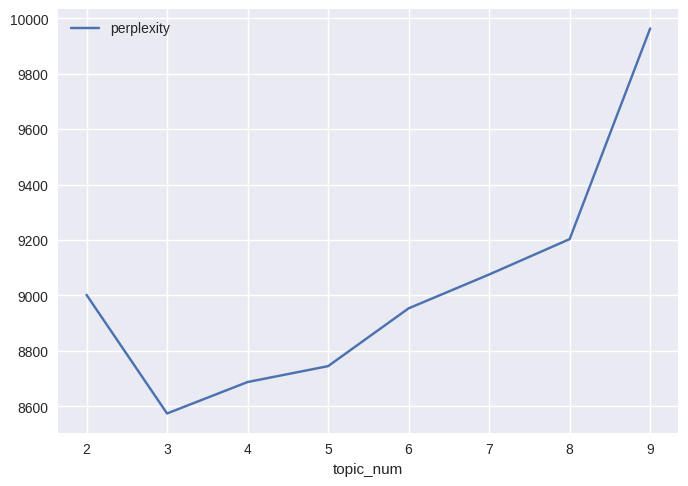

In [ ]:
TSMC_result.plot.line(x='topic_num', y='perplexity')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='topic_num'>

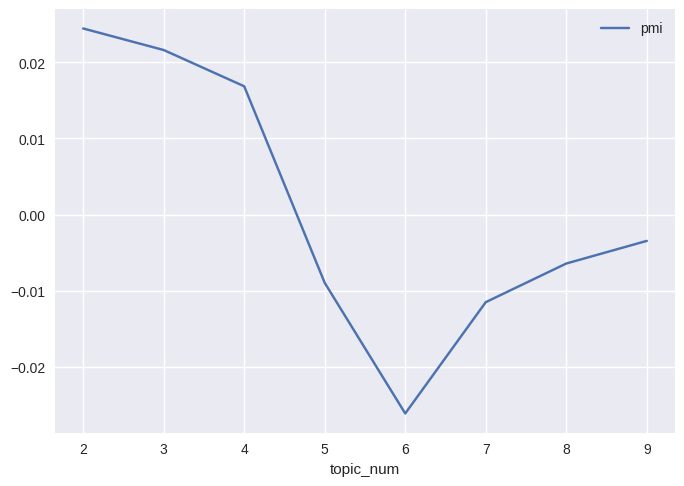

In [ ]:
TSMC_result.plot.line(x='topic_num', y='pmi')

就訓練結果來看，主題數目 3 為最佳

In [ ]:
best_TSMC_model = LdaModel(
    corpus = TSMC_corpus,
    num_topics = 3,
    id2word = TSMC_dictionary,
    random_state = 1500,
    passes = 10 # 訓練次數
    )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(best_TSMC_model, TSMC_corpus, TSMC_dictionary)
p

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.040847 -0.145829       1        1  65.635502
0     -0.160438  0.041007       2        1  21.673823
1      0.119591  0.104821       3        1  12.690675, topic_info=     Term         Freq        Total Category  logprob  loglift
156    晶片  1362.000000  1362.000000  Default  30.0000  30.0000
79    半導體  1791.000000  1791.000000  Default  29.0000  29.0000
19     台積  2470.000000  2470.000000  Default  28.0000  28.0000
4     台積電  3003.000000  3003.000000  Default  27.0000  27.0000
844    技術   798.000000   798.000000  Default  26.0000  26.0000
...   ...          ...          ...      ...      ...      ...
1932   宣布    87.962985   465.623016   Topic3  -6.1503   0.3978
92     問題    89.694532   668.554829   Topic3  -6.1308   0.0556
160    未來    90.859628   935.622195   Topic3  -6.1179  -0.2676
244    記者    84.869060   751.727365   Topic3  -6.1861  -0.1170
203    科技    85.328717   924.415673   Topic3  -6.1807  -0.3183

[251 rows x 6 columns], token_table=      Topic      Freq Term
term                      
3279      1  0.087935   一名
3279      2  0.050248   一名
3279      3  0.854223   一名
43        1  0.004039   三星
43        2  0.904813   三星
...     ...       ...  ...
2807      2  0.003370  魏哲家
2807      3  0.994055  魏哲家
3868      1  1.001433   鴻海
7821      1  1.000103   龍潭
9664      1  0.999914   龍科

[401 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

主題一：台灣台積電在高雄設廠相關<br>
主題二：晶片、半導體、製成相關技術主題<br>
主題三：與台積電高層有關相關主題

### 艾司摩爾

In [ ]:
ASML_df = pre_process_data(ASML_selected)
ASML_df["words"] = ASML_df["sentence"].apply(getToken)

ASML_docs = ASML_df['words'].to_list()
ASML_dictionary = Dictionary(ASML_docs)

# Bag-of-words representation of the documents.
# 用 gensim ldamodel input 需要將文章轉換成 bag of words
ASML_corpus = [ASML_dictionary.doc2bow(doc) for doc in ASML_docs]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
t0 = time.time()

topic_num_list = np.arange(2, 10)
ASML_result = {"topic_num":[], "perplexity":[], "pmi":[]}
model_set = dict()


for topic_num in topic_num_list:
    # perplexity
    model = LdaModel(
        corpus = ASML_corpus,
        num_topics = topic_num ,
        id2word = ASML_dictionary,
        random_state = 1500,
        passes=10 # 訓練次數
        )

    loss = model.log_perplexity(ASML_corpus)
    pmi = CoherenceModel(model=model, texts=ASML_docs, coherence='c_npmi').get_coherence()
    perplexity = np.exp(-1. * loss)

    # model_set[f'k_{topic_num}'] = model

    ASML_result['topic_num'].append(topic_num)
    ASML_result['perplexity'].append(perplexity)
    ASML_result['pmi'].append(pmi)

print(f"花費時間: {time.time() - t0} sec")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


花費時間: 7.947285413742065 sec


In [ ]:
ASML_result = pd.DataFrame(ASML_result)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='topic_num'>

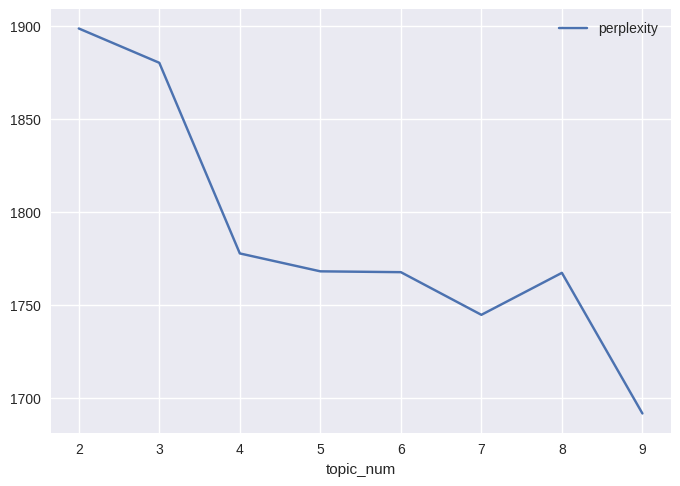

In [ ]:
ASML_result.plot.line(x='topic_num', y='perplexity')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='topic_num'>

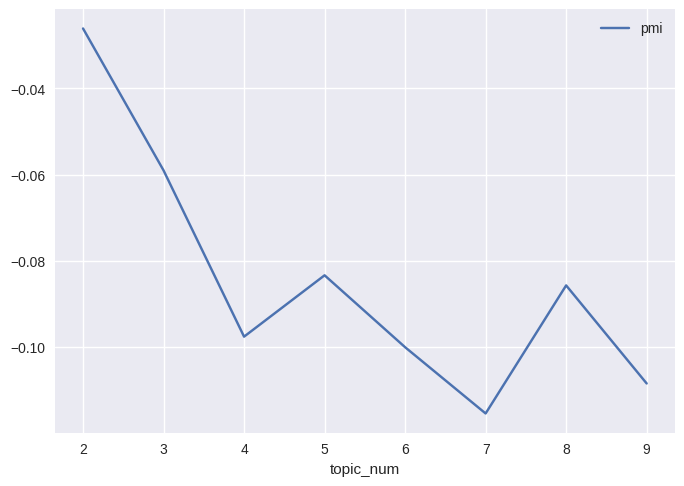

In [ ]:
ASML_result.plot.line(x='topic_num', y='pmi')

就訓練結果來看，主題數目 5 為最佳

In [ ]:
best_ASML_model = LdaModel(
    corpus = ASML_corpus,
    num_topics = 5,
    id2word = ASML_dictionary,
    random_state = 1500,
    passes = 10 # 訓練次數
    )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(best_ASML_model, ASML_corpus, ASML_dictionary)
p

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.121768  0.001022       1        1  45.902946
2     -0.015438 -0.137307       2        1  19.205923
4     -0.159008  0.027103       3        1  13.563808
1      0.040451  0.025887       4        1  10.666124
0      0.012226  0.083295       5        1  10.661199, topic_info=    Term        Freq       Total Category  logprob  loglift
3     中國  176.000000  176.000000  Default  30.0000  30.0000
152   台灣   89.000000   89.000000  Default  29.0000  29.0000
416   製程   70.000000   70.000000  Default  28.0000  28.0000
21    出口   40.000000   40.000000  Default  27.0000  27.0000
27   半導體   91.000000   91.000000  Default  26.0000  26.0000
..   ...         ...         ...      ...      ...      ...
493   產品    4.524045   25.517216   Topic5  -5.7409   0.5086
180   全球    4.688160   33.951723   Topic5  -5.7053   0.2587
123   設備    4.859105   76.516620   Topic5  -5.6695  -0.5181
66    晶片    4.745255  191.657807   Topic5  -5.6932  -1.4600
152   台灣    4.113053   89.207637   Topic5  -5.8362  -0.8382

[343 rows x 6 columns], token_table=      Topic      Freq Term
term                      
1895      3  0.880991   一半
2367      5  0.742614   七期
164       1  0.309337   三星
164       2  0.378078   三星
164       3  0.103112   三星
...     ...       ...  ...
1717      2  0.875611   鴻蒙
757       1  0.930190   麒麟
2072      1  0.092371   黃國
2072      2  0.831337   黃國
3281      3  0.701213  黎越貞

[548 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 5, 2, 1])

主題一：中國大陸晶片市場相關主題<br>
主題二：艾斯摩爾想咬在其他國家設廠相關主題<br>
主題三：與台灣半導體相關主題<br>
主題四：不同科技廠的晶片製程技術相關主題<br>
主題五：晶片出口相關主題

### 美光

In [ ]:
MU_df = pre_process_data(MU_selected)
MU_df["words"] = MU_df["sentence"].apply(getToken)

MU_docs = MU_df['words'].to_list()
MU_dictionary = Dictionary(MU_docs)

# Bag-of-words representation of the documents.
# 用 gensim ldamodel input 需要將文章轉換成 bag of words
MU_corpus = [MU_dictionary.doc2bow(doc) for doc in MU_docs]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
t0 = time.time()

topic_num_list = np.arange(2, 10)
MU_result = {"topic_num":[], "perplexity":[], "pmi":[]}
model_set = dict()


for topic_num in topic_num_list:
    # perplexity
    model = LdaModel(
        corpus = MU_corpus,
        num_topics = topic_num ,
        id2word = MU_dictionary,
        random_state = 1500,
        passes=10 # 訓練次數
        )

    loss = model.log_perplexity(MU_corpus)
    pmi = CoherenceModel(model=model, texts=MU_docs, coherence='c_npmi').get_coherence()
    perplexity = np.exp(-1. * loss)

    # model_set[f'k_{topic_num}'] = model

    MU_result['topic_num'].append(topic_num)
    MU_result['perplexity'].append(perplexity)
    MU_result['pmi'].append(pmi)

print(f"花費時間: {time.time() - t0} sec")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


花費時間: 4.9121785163879395 sec


In [ ]:
MU_result = pd.DataFrame(MU_result)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='topic_num'>

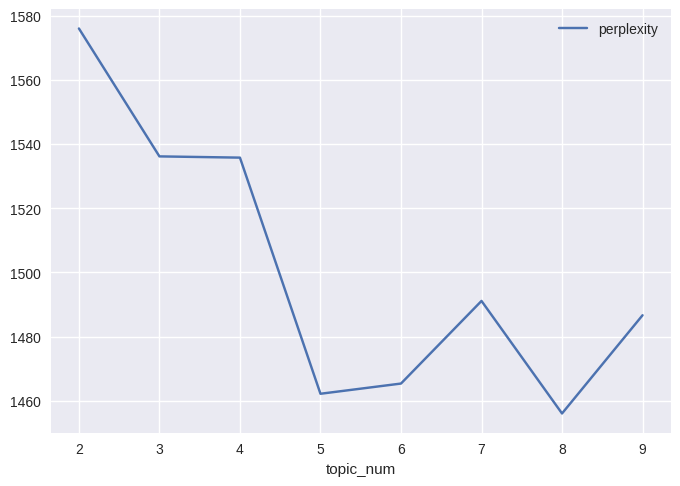

In [ ]:
MU_result.plot.line(x='topic_num', y='perplexity')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='topic_num'>

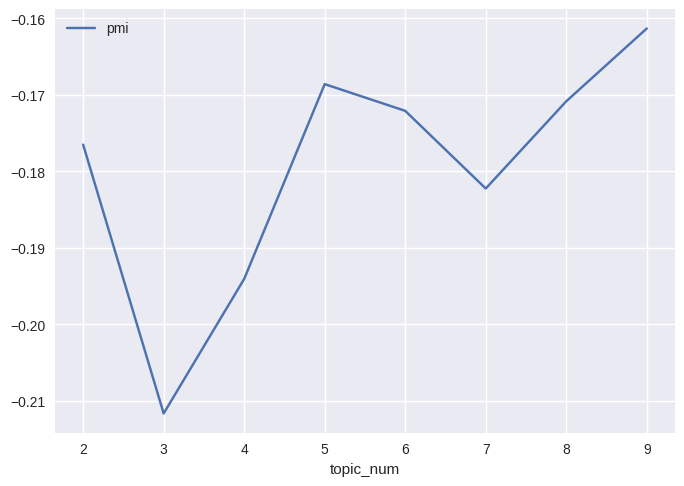

In [ ]:
MU_result.plot.line(x='topic_num', y='pmi')

就訓練結果來看，主題數目 5 為最佳

In [ ]:
best_MU_model = LdaModel(
    corpus = MU_corpus,
    num_topics = 5,
    id2word = MU_dictionary,
    random_state = 1500,
    passes = 10 # 訓練次數
    )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(best_MU_model, MU_corpus, MU_dictionary)
p

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.113620  0.078422       1        1  47.109594
4      0.052968  0.049648       2        1  23.091431
1     -0.174044  0.060430       3        1  18.269108
2      0.019810 -0.104194       4        1   6.251927
0     -0.012354 -0.084305       5        1   5.277940, topic_info=    Term       Freq       Total Category  logprob  loglift
209   裁員  39.000000   39.000000  Default  30.0000  30.0000
68    中科  17.000000   17.000000  Default  29.0000  29.0000
112   員工  27.000000   27.000000  Default  28.0000  28.0000
14    台積  14.000000   14.000000  Default  27.0000  27.0000
15   台積電  22.000000   22.000000  Default  26.0000  26.0000
..   ...        ...         ...      ...      ...      ...
208   表示   1.336273   32.765520   Topic5  -5.5272  -0.2579
44    美光   0.932542  126.412300   Topic5  -5.8869  -1.9678
227   進行   0.916199    9.998288   Topic5  -5.9046   0.5517
48    記者   0.915114   13.887631   Topic5  -5.9058   0.2219
143   廠商   0.914220   20.464663   Topic5  -5.9068  -0.1667

[295 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
736       4  0.643073     一光
577       3  0.951489     一名
671       4  0.642650     一至
458       1  0.141011     三星
458       2  0.564042     三星
...     ...       ...    ...
2252      5  0.528743  高爾夫球場
240       1  0.062836     高通
240       2  0.188509     高通
240       3  0.691201     高通
2253      5  0.678130     龍潭

[395 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 2, 3, 1])

可以看到(1,2) (4,5)很相近，試試看跑3個主題

In [ ]:
model_3 = LdaModel(
    corpus = MU_corpus,
    num_topics = 3,
    id2word = MU_dictionary,
    random_state = 1500,
    passes = 10 # 訓練次數
    )
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(model_3, MU_corpus, MU_dictionary)
p

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.113036 -0.039506       1        1  47.377328
1     -0.104633 -0.049855       2        1  40.736617
0     -0.008403  0.089361       3        1  11.886055, topic_info=     Term       Freq       Total Category  logprob  loglift
15    台積電  20.000000   20.000000  Default  30.0000  30.0000
1434  盧東暉  36.000000   36.000000  Default  29.0000  29.0000
14     台積  16.000000   16.000000  Default  28.0000  28.0000
68     中科  18.000000   18.000000  Default  27.0000  27.0000
844    日本  50.000000   50.000000  Default  26.0000  26.0000
...   ...        ...         ...      ...      ...      ...
22     完整   2.029183   12.060361   Topic3  -5.9213   0.3475
30     新聞   1.935251    9.760619   Topic3  -5.9687   0.5117
44     美光   2.555567  124.206599   Topic3  -5.6906  -1.7539
209    裁員   2.142093   39.970418   Topic3  -5.8671  -0.7966
166    最新   1.816623    7.475298   Topic3  -6.0319   0.7152

[196 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
2166      3  0.598947     三期
2169      3  0.924879     中央
1011      1  0.955358    中央社
883       1  0.891622     中心
883       2  0.074302     中心
...     ...       ...    ...
2252      3  0.924977  高爾夫球場
240       1  0.060228     高通
240       2  0.903421     高通
979       1  0.955437     高頻
2253      3  0.599222     龍潭

[235 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

主題一：台灣美光半導體投資及製程相關主題<br>
主題二：日本美光廠相關主題<br>
主題三：美光台中廠相關以及與台積電合作相關主題

### 聯發科

In [ ]:
MTK_df = pre_process_data(MTK_selected)
MTK_df["words"] = MTK_df["sentence"].apply(getToken)

MTK_docs = MTK_df['words'].to_list()
MTK_dictionary = Dictionary(MTK_docs)

# Bag-of-words representation of the documents.
# 用 gensim ldamodel input 需要將文章轉換成 bag of words
MTK_corpus = [MTK_dictionary.doc2bow(doc) for doc in MTK_docs]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
t0 = time.time()

topic_num_list = np.arange(2, 10)
MTK_result = {"topic_num":[], "perplexity":[], "pmi":[]}
model_set = dict()


for topic_num in topic_num_list:
    # perplexity
    model = LdaModel(
        corpus = MTK_corpus,
        num_topics = topic_num ,
        id2word = MTK_dictionary,
        random_state = 1500,
        passes=10 # 訓練次數
        )

    loss = model.log_perplexity(MTK_corpus)
    pmi = CoherenceModel(model=model, texts=MTK_docs, coherence='c_npmi').get_coherence()
    perplexity = np.exp(-1. * loss)

    # model_set[f'k_{topic_num}'] = model

    MTK_result['topic_num'].append(topic_num)
    MTK_result['perplexity'].append(perplexity)
    MTK_result['pmi'].append(pmi)

print(f"花費時間: {time.time() - t0} sec")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


花費時間: 16.523488759994507 sec


In [ ]:
MTK_result = pd.DataFrame(MTK_result)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='topic_num'>

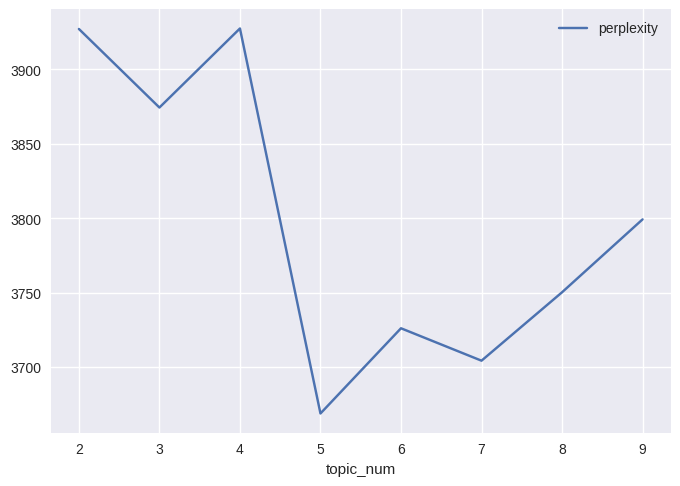

In [ ]:
MTK_result.plot.line(x='topic_num', y='perplexity')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='topic_num'>

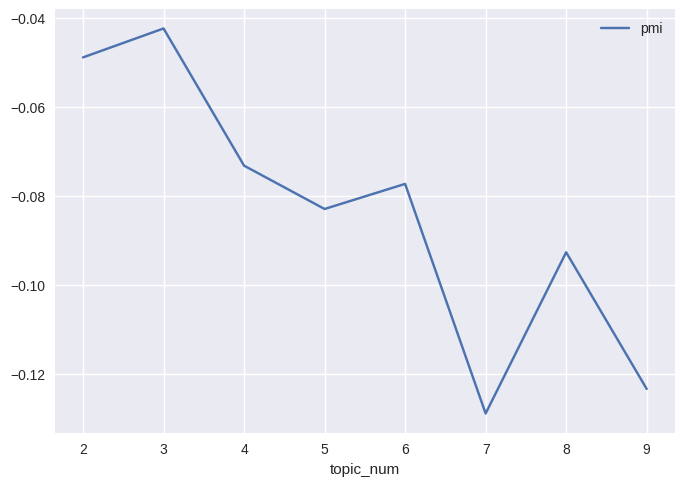

In [ ]:
MTK_result.plot.line(x='topic_num', y='pmi')

就訓練結果來看，主題數目 5 為最佳

In [ ]:
best_MTK_model = LdaModel(
    corpus = MTK_corpus,
    num_topics = 5,
    id2word = MTK_dictionary,
    random_state = 1500,
    passes = 10 # 訓練次數
    )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(best_MTK_model, MTK_corpus, MTK_dictionary)
p

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.176447 -0.015145       1        1  31.026334
2     -0.075380 -0.066667       2        1  25.448401
1     -0.045563 -0.079201       3        1  19.644460
3      0.003418  0.056550       4        1  12.259498
0     -0.058921  0.104463       5        1  11.621307, topic_info=     Term        Freq       Total Category  logprob  loglift
28     台灣  205.000000  205.000000  Default  30.0000  30.0000
6512   美光   44.000000   44.000000  Default  29.0000  29.0000
6479  盧東暉   26.000000   26.000000  Default  28.0000  28.0000
563    手機  134.000000  134.000000  Default  27.0000  27.0000
1233   旗艦   58.000000   58.000000  Default  26.0000  26.0000
...   ...         ...         ...      ...      ...      ...
1172   市場    7.322616  101.432270   Topic5  -6.1599  -0.4761
181    科技    7.429915  120.125232   Topic5  -6.1454  -0.6307
535    全球    6.895832   69.870036   Topic5  -6.2200  -0.1634
268    公司    6.613279  143.782439   Topic5  -6.2618  -0.9269
512    現在    6.263451   66.772002   Topic5  -6.3162  -0.2142

[380 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
4646      4  0.867229   上下游
0         2  0.144141  上市公司
0         3  0.720703  上市公司
1432      1  0.137524    上漲
1432      3  0.137524    上漲
...     ...       ...   ...
2053      4  0.074028    麒麟
4104      1  0.172433    黃金
4104      4  0.172433    黃金
4104      5  0.689731    黃金
4105      5  0.861624    點或

[682 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 2, 4, 1])

可以看到(2,3)很相近，試試看跑4個主題

In [ ]:
model_4 = LdaModel(
    corpus = MTK_corpus,
    num_topics = 4,
    id2word = MTK_dictionary,
    random_state = 1500,
    passes = 10 # 訓練次數
    )
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(model_4, MTK_corpus, MTK_dictionary)
p

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.053338 -0.031239       1        1  31.020809
2     -0.032824 -0.094599       2        1  30.392887
3      0.083887  0.062132       3        1  25.751874
0     -0.104402  0.063706       4        1  12.834430, topic_info=     Term        Freq       Total Category  logprob  loglift
6512   美光   42.000000   42.000000  Default  30.0000  30.0000
28     台灣  211.000000  211.000000  Default  29.0000  29.0000
6479  盧東暉   25.000000   25.000000  Default  28.0000  28.0000
563    手機  126.000000  126.000000  Default  27.0000  27.0000
148    工作   65.000000   65.000000  Default  26.0000  26.0000
...   ...         ...         ...      ...      ...      ...
2798  董事長    6.676034   31.558935   Topic4  -6.3517   0.4997
1172   市場    8.028742   96.059723   Topic4  -6.1672  -0.4289
535    全球    7.243107   70.978594   Topic4  -6.2701  -0.2293
181    科技    7.669567  123.673847   Topic4  -6.2129  -0.7273
29     台積    7.127796  113.093025   Topic4  -6.2862  -0.7112

[309 rows x 6 columns], token_table=      Topic      Freq Term
term                      
1432      1  0.285115   上漲
1432      4  0.712787   上漲
5543      3  0.837477   上聯
1433      4  0.850396   上行
1731      2  0.927923   下屬
...     ...       ...  ...
2053      3  0.073794   麒麟
2053      4  0.073794   麒麟
4104      3  0.354127   黃金
4104      4  0.531191   黃金
4105      4  0.884479   點或

[508 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 4, 1])

主題一：聯發科採用台積電設計的晶片應用於手機上相關主題<br>
主題二：華為採用的是聯發科晶片相關主題<br>
主題三：聯發科手機晶片相關主題<br>
主題四：美光為聯發科提供行動記憶體相關主題

### 群聯電子

In [ ]:
PEC_df = pre_process_data(PEC_selected)
PEC_df["words"] = PEC_df["sentence"].apply(getToken)

PEC_docs = PEC_df['words'].to_list()
PEC_dictionary = Dictionary(PEC_docs)

# Bag-of-words representation of the documents.
# 用 gensim ldamodel input 需要將文章轉換成 bag of words
PEC_corpus = [PEC_dictionary.doc2bow(doc) for doc in PEC_docs]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
t0 = time.time()

topic_num_list = np.arange(2, 10)
PEC_result = {"topic_num":[], "perplexity":[], "pmi":[]}
model_set = dict()


for topic_num in topic_num_list:
    # perplexity
    model = LdaModel(
        corpus = PEC_corpus,
        num_topics = topic_num ,
        id2word = PEC_dictionary,
        random_state = 1500,
        passes=10 # 訓練次數
        )

    loss = model.log_perplexity(PEC_corpus)
    pmi = CoherenceModel(model=model, texts=PEC_docs, coherence='c_npmi').get_coherence()
    perplexity = np.exp(-1. * loss)

    # model_set[f'k_{topic_num}'] = model

    PEC_result['topic_num'].append(topic_num)
    PEC_result['perplexity'].append(perplexity)
    PEC_result['pmi'].append(pmi)

print(f"花費時間: {time.time() - t0} sec")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


花費時間: 3.1151347160339355 sec


In [ ]:
PEC_result = pd.DataFrame(PEC_result)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='topic_num'>

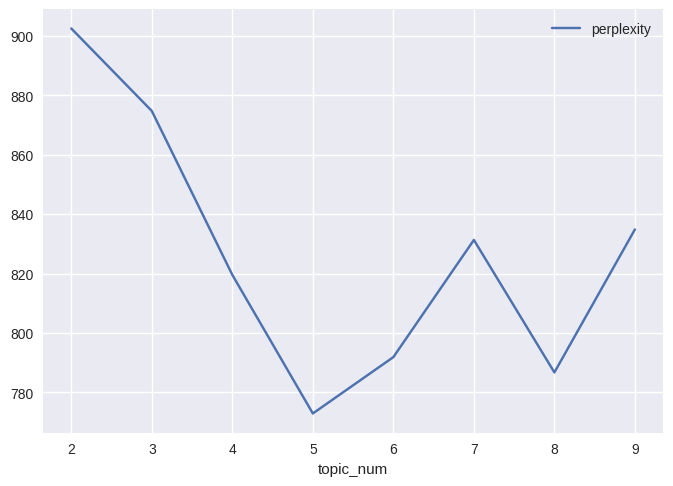

In [ ]:
PEC_result.plot.line(x='topic_num', y='perplexity')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='topic_num'>

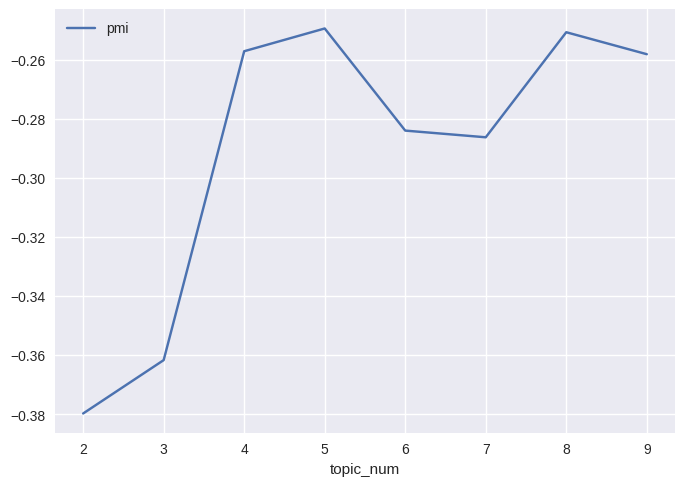

In [ ]:
PEC_result.plot.line(x='topic_num', y='pmi')

就訓練結果來看，主題數目 5 為最佳

In [ ]:
best_PEC_model = LdaModel(
    corpus = PEC_corpus,
    num_topics = 5,
    id2word = PEC_dictionary,
    random_state = 1500,
    passes = 10 # 訓練次數
    )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(best_PEC_model, PEC_corpus, PEC_dictionary)
p

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.104347 -0.148859       1        1  30.490664
4     -0.195180 -0.016279       2        1  27.619354
1      0.092062  0.137946       3        1  25.108126
3     -0.012052  0.027896       4        1  13.922802
2      0.010823 -0.000704       5        1   2.859054, topic_info=    Term       Freq      Total Category  logprob  loglift
225   億元   8.000000   8.000000  Default  30.0000  30.0000
62    分紅  11.000000  11.000000  Default  29.0000  29.0000
151   科技   5.000000   5.000000  Default  28.0000  28.0000
812   面試   8.000000   8.000000  Default  27.0000  27.0000
250   外資   4.000000   4.000000  Default  26.0000  26.0000
..   ...        ...        ...      ...      ...      ...
163   群聯   0.254361  14.636253   Topic5  -5.2361  -0.4978
30    薪資   0.253496   5.106922   Topic5  -5.2395   0.5517
9     台積   0.253484   5.712709   Topic5  -5.2396   0.4395
466   台灣   0.253312   4.306944   Topic5  -5.2402   0.7213
39    一下   0.252623   2.241094   Topic5  -5.2430   1.3719

[233 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
39        2  0.892421    一下
632       1  0.711591    一些
208       4  0.581763    一檔
44        2  0.864010    一間
211       4  0.875773    三大
...     ...       ...   ...
631       3  1.003800  高速傳輸
355       4  0.866870    高達
206       2  0.742959    高鐵
206       4  0.247653    高鐵
356       4  0.867075    高點

[207 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 2, 4, 3])

可以看到(4,5)很相近，試試看跑4個主題




In [ ]:
model_4 = LdaModel(
    corpus = PEC_corpus,
    num_topics = 4,
    id2word = PEC_dictionary,
    random_state = 1500,
    passes = 10 # 訓練次數
    )
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(model_4, PEC_corpus, PEC_dictionary)
p

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.053211 -0.146014       1        1  36.497541
0      0.108316  0.119067       2        1  30.517270
1     -0.169757  0.030053       3        1  30.099404
2      0.008230 -0.003106       4        1   2.885786, topic_info=    Term       Freq      Total Category  logprob  loglift
62    分紅  10.000000  10.000000  Default  30.0000  30.0000
812   面試   8.000000   8.000000  Default  29.0000  29.0000
151   科技   5.000000   5.000000  Default  28.0000  28.0000
163   群聯  14.000000  14.000000  Default  27.0000  27.0000
91   工程師   8.000000   8.000000  Default  26.0000  26.0000
..   ...        ...        ...      ...      ...      ...
163   群聯   0.224018  14.053475   Topic4  -5.3724  -0.5935
9     台積   0.223227   5.840455   Topic4  -5.3760   0.2810
30    薪資   0.223187   4.902125   Topic4  -5.3761   0.4560
466   台灣   0.222753   4.415791   Topic4  -5.3781   0.5585
128   業的   0.221959   2.135509   Topic4  -5.3817   1.2814

[191 rows x 6 columns], token_table=      Topic      Freq Term
term                      
39        3  0.936593   一下
632       2  0.750968   一些
44        3  0.897946   一間
1         3  0.754570   一點
211       1  0.721441   三大
...     ...       ...  ...
815       2  0.750940   韌體
626       1  1.005508   預期
201       3  0.898237  頭期款
206       1  0.245536   高鐵
206       3  0.736608   高鐵

[164 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 3])

由於主題四只有金字塔一個字，所以再將主題縮減為3個主題

In [ ]:
model_3 = LdaModel(
    corpus = PEC_corpus,
    num_topics = 3,
    id2word = PEC_dictionary,
    random_state = 1500,
    passes = 10 # 訓練次數
    )
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(model_3, PEC_corpus, PEC_dictionary)
p

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.114826 -0.053007       1        1  59.207394
0     -0.119680 -0.046809       2        1  24.045137
2      0.004854  0.099816       3        1  16.747469, topic_info=    Term      Freq      Total Category  logprob  loglift
225   億元  7.000000   7.000000  Default  30.0000  30.0000
812   面試  6.000000   6.000000  Default  29.0000  29.0000
250   外資  4.000000   4.000000  Default  28.0000  28.0000
884  金字塔  3.000000   3.000000  Default  27.0000  27.0000
329   買超  3.000000   3.000000  Default  26.0000  26.0000
..   ...       ...        ...      ...      ...      ...
151   科技  1.144586   6.184853   Topic3  -5.4998   0.0999
57    備註  1.124179   4.660403   Topic3  -5.5178   0.3649
163   群聯  1.136219  13.672038   Topic3  -5.5071  -0.7007
83    媒體  1.123245   4.661375   Topic3  -5.5186   0.3638
285   未來  1.119866   4.662401   Topic3  -5.5216   0.3606

[152 rows x 6 columns], token_table=      Topic      Freq Term
term                      
632       2  0.855868   一些
208       3  0.628087   一檔
211       3  0.961175   三大
826       2  0.855738   中迅
216       1  0.639435   主要
...     ...       ...  ...
812       2  0.864225   面試
813       2  0.855797  面試官
815       2  0.855896   韌體
626       1  0.959191   預期
886       3  0.911926   高通

[144 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

主題一：群聯電子工程師分紅相關主題<br>
主題二：群聯電子公司面試相關主題<br>
主題三：群聯電子公司股票相關主題，e.g.外資、買超、法人...

## 整體的情緒分析

In [ ]:
# 讀入中文示範資料集
origin_data = pd.read_csv('./raw_data/TechJob.csv')
origin_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


system_id                                             artUrl  \
0          1  https://www.ptt.cc/bbs/Gossiping/M.1688140859....   
1          2  https://www.ptt.cc/bbs/Gossiping/M.1688148966....   
2          3  https://www.ptt.cc/bbs/Gossiping/M.1688150076....   
3          4  https://www.ptt.cc/bbs/Gossiping/M.1688171873....   
4          5  https://www.ptt.cc/bbs/Gossiping/M.1688173592....   

                   artTitle              artDate    artPoster artCatagory  \
0  [新聞]美國、荷蘭揮組合拳痛擊中國晶片商SMIC  2023-07-01 00:00:55       ttucse   Gossiping   
1          [問卦]荷蘭艾司摩爾為啥這麼強？  2023-07-01 02:16:03  lonzoball02   Gossiping   
2       Re:[問卦]荷蘭艾司摩爾為啥這麼強？  2023-07-01 02:34:34    meblessme   Gossiping   
3     [問卦]台大電機系的學生說唸物理只能要飯？  2023-07-01 08:37:51      Qunnine   Gossiping   
4    [新聞]半導體競爭力隱憂！國內綠電不足，台積  2023-07-01 09:06:30      DANANPA   Gossiping   

                                          artContent  \
0  美國、荷蘭揮組合拳痛擊中國晶片商 SMIC遭盯上\nhttps://m.moneydj.co...   
1  荷蘭公司艾司摩爾\n做半導體的\n\n半導體台灣不是世界最頂的嗎？\n\n荷蘭不是剩文化和觀...   
2  荷蘭沒有on call, 沒有高工時，沒有996 沒有低薪\n就是家歐洲公司\n不用賣新鮮肝...   
3  前陣子經過公館啦！\n\n應該是電機系的學生\n\nA：我覺得你碩班還是唸電機的好\n\n跑...   
4  1.媒體來源: 科技新報\n\n2.記者署名: 林妤柔\n\n3.完整新聞標題:\n半導體競...   

                                          artComment            e_ip  \
0  [{"cmtStatus": "推", "cmtPoster": "WeAntiTVBS",...   218.172.21.71   
1  [{"cmtStatus": "→", "cmtPoster": "whiteadam", ...    118.167.2.61   
2  [{"cmtStatus": "→", "cmtPoster": "showwin", "c...   42.73.130.239   
3  [{"cmtStatus": "噓", "cmtPoster": "railman", "c...  118.167.19.120   
4  [{"cmtStatus": "→", "cmtPoster": "s820912gmail...   106.64.160.11   

          insertedDate dataSource  
0  2023-07-01 01:48:29        ptt  
1  2023-07-02 01:33:04        ptt  
2  2023-07-02 01:33:04        ptt  
3  2023-07-02 01:33:45        ptt  
4  2023-07-02 01:34:00        ptt

In [ ]:
origin_data["artDate"] = pd.to_datetime(origin_data["artDate"])
origin_data['artDate'] = origin_data['artDate'].dt.date
origin_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


system_id                                             artUrl  \
0          1  https://www.ptt.cc/bbs/Gossiping/M.1688140859....   
1          2  https://www.ptt.cc/bbs/Gossiping/M.1688148966....   
2          3  https://www.ptt.cc/bbs/Gossiping/M.1688150076....   
3          4  https://www.ptt.cc/bbs/Gossiping/M.1688171873....   
4          5  https://www.ptt.cc/bbs/Gossiping/M.1688173592....   

                   artTitle     artDate    artPoster artCatagory  \
0  [新聞]美國、荷蘭揮組合拳痛擊中國晶片商SMIC  2023-07-01       ttucse   Gossiping   
1          [問卦]荷蘭艾司摩爾為啥這麼強？  2023-07-01  lonzoball02   Gossiping   
2       Re:[問卦]荷蘭艾司摩爾為啥這麼強？  2023-07-01    meblessme   Gossiping   
3     [問卦]台大電機系的學生說唸物理只能要飯？  2023-07-01      Qunnine   Gossiping   
4    [新聞]半導體競爭力隱憂！國內綠電不足，台積  2023-07-01      DANANPA   Gossiping   

                                          artContent  \
0  美國、荷蘭揮組合拳痛擊中國晶片商 SMIC遭盯上\nhttps://m.moneydj.co...   
1  荷蘭公司艾司摩爾\n做半導體的\n\n半導體台灣不是世界最頂的嗎？\n\n荷蘭不是剩文化和觀...   
2  荷蘭沒有on call, 沒有高工時，沒有996 沒有低薪\n就是家歐洲公司\n不用賣新鮮肝...   
3  前陣子經過公館啦！\n\n應該是電機系的學生\n\nA：我覺得你碩班還是唸電機的好\n\n跑...   
4  1.媒體來源: 科技新報\n\n2.記者署名: 林妤柔\n\n3.完整新聞標題:\n半導體競...   

                                          artComment            e_ip  \
0  [{"cmtStatus": "推", "cmtPoster": "WeAntiTVBS",...   218.172.21.71   
1  [{"cmtStatus": "→", "cmtPoster": "whiteadam", ...    118.167.2.61   
2  [{"cmtStatus": "→", "cmtPoster": "showwin", "c...   42.73.130.239   
3  [{"cmtStatus": "噓", "cmtPoster": "railman", "c...  118.167.19.120   
4  [{"cmtStatus": "→", "cmtPoster": "s820912gmail...   106.64.160.11   

          insertedDate dataSource  
0  2023-07-01 01:48:29        ptt  
1  2023-07-02 01:33:04        ptt  
2  2023-07-02 01:33:04        ptt  
3  2023-07-02 01:33:45        ptt  
4  2023-07-02 01:34:00        ptt

In [ ]:
# 去除一些不需要的欄位
metaData = origin_data.drop(['artPoster', 'artCatagory', 'artComment', 'e_ip', 'insertedDate', 'dataSource'], axis=1)

# 只留下中文字
metaData['sentence'] = metaData['artContent'].str.replace(r'\n\n','。', regex=True)
metaData['sentence'] = metaData['sentence'].str.replace(r'\n','', regex=True)

metaData['sentence'] = metaData['sentence'].str.split("[,，。！!？?]{1,}")
metaData = metaData.explode('sentence').reset_index(drop=True)

# 檢查並只保留中文字
metaData['sentence'] = metaData['sentence'].apply(lambda x: re.sub('[^\u4e00-\u9fff]+', '', x) if isinstance(x, str) else '')

metaData['artDate'] = pd.to_datetime(metaData['artDate']).dt.date

metaData.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


system_id                                             artUrl  \
0          1  https://www.ptt.cc/bbs/Gossiping/M.1688140859....   
1          1  https://www.ptt.cc/bbs/Gossiping/M.1688140859....   
2          1  https://www.ptt.cc/bbs/Gossiping/M.1688140859....   
3          1  https://www.ptt.cc/bbs/Gossiping/M.1688140859....   
4          1  https://www.ptt.cc/bbs/Gossiping/M.1688140859....   

                   artTitle     artDate  \
0  [新聞]美國、荷蘭揮組合拳痛擊中國晶片商SMIC  2023-07-01   
1  [新聞]美國、荷蘭揮組合拳痛擊中國晶片商SMIC  2023-07-01   
2  [新聞]美國、荷蘭揮組合拳痛擊中國晶片商SMIC  2023-07-01   
3  [新聞]美國、荷蘭揮組合拳痛擊中國晶片商SMIC  2023-07-01   
4  [新聞]美國、荷蘭揮組合拳痛擊中國晶片商SMIC  2023-07-01   

                                          artContent                sentence  
0  美國、荷蘭揮組合拳痛擊中國晶片商 SMIC遭盯上\nhttps://m.moneydj.co...      美國荷蘭揮組合拳痛擊中國晶片商遭盯上  
1  美國、荷蘭揮組合拳痛擊中國晶片商 SMIC遭盯上\nhttps://m.moneydj.co...                          
2  美國、荷蘭揮組合拳痛擊中國晶片商 SMIC遭盯上\nhttps://m.moneydj.co...               新聞記者郭妍希報導  
3  美國、荷蘭揮組合拳痛擊中國晶片商 SMIC遭盯上\nhttps://m.moneydj.co...  美國荷蘭預料今年夏季將接連揮拳重擊中國晶片商  
4  美國、荷蘭揮組合拳痛擊中國晶片商 SMIC遭盯上\nhttps://m.moneydj.co...           進一步限制晶片製造設備出口

### Sentiment Classification
使用 Huggingface 上面已經針對 Sentiment classification 任務 finetune 的 模型來實作<br>
使用的模型：https://huggingface.co/lxyuan/distilbert-base-multilingual-cased-sentiments-student<br><br>
情緒：<br>
1: Positive<br>
2: Neutral<br>
3: Negative

In [ ]:
# 載入已經被 fine-tune 過的 BERT 模型
model_name = "lxyuan/distilbert-base-multilingual-cased-sentiments-student"
model = pipeline("text-classification", model=model_name)

# 使用模型來進行情緒分析
text = ["我喜歡這部電影！", "他的行為讓我很困擾"]
result = model(text)

# 輸出結果
result

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/759 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/373 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

[{'label': 'positive', 'score': 0.991874635219574},
 {'label': 'negative', 'score': 0.6645813584327698}]

### 模型運行結果

In [ ]:
# 建立一個新的 dataframe 來儲存結果
results_df = pd.DataFrame(columns=['artUrl', 'artTitle', 'artDate',	'artContent', 'sentence', 'label', 'score'])

results_df['artUrl'] = metaData['artUrl']
results_df['artTitle'] = metaData['artTitle']
results_df['artDate'] = metaData['artDate']
results_df['artContent'] = metaData['artContent']
results_df['sentence'] = metaData['sentence']

# 定義一個函數來進行情緒分析
def analyze_sentiment(sentence):
    result = model([sentence])
    return pd.Series([result[0]['label'], result[0]['score']])

# 使用 apply 函數來進行情緒分析
results_df[['label', 'score']] = metaData['sentence'].apply(analyze_sentiment)

# 輸出結果
results_df

artUrl  \
0      https://www.ptt.cc/bbs/Gossiping/M.1688140859....   
1      https://www.ptt.cc/bbs/Gossiping/M.1688140859....   
2      https://www.ptt.cc/bbs/Gossiping/M.1688140859....   
3      https://www.ptt.cc/bbs/Gossiping/M.1688140859....   
4      https://www.ptt.cc/bbs/Gossiping/M.1688140859....   
...                                                  ...   
83865  https://www.ptt.cc/bbs/Tech_Job/M.1704034806.A...   
83866  https://www.ptt.cc/bbs/Tech_Job/M.1704034806.A...   
83867  https://www.ptt.cc/bbs/Tech_Job/M.1704034806.A...   
83868  https://www.ptt.cc/bbs/Tech_Job/M.1704034806.A...   
83869  https://www.ptt.cc/bbs/Tech_Job/M.1704034806.A...   

                       artTitle     artDate  \
0      [新聞]美國、荷蘭揮組合拳痛擊中國晶片商SMIC  2023-07-01   
1      [新聞]美國、荷蘭揮組合拳痛擊中國晶片商SMIC  2023-07-01   
2      [新聞]美國、荷蘭揮組合拳痛擊中國晶片商SMIC  2023-07-01   
3      [新聞]美國、荷蘭揮組合拳痛擊中國晶片商SMIC  2023-07-01   
4      [新聞]美國、荷蘭揮組合拳痛擊中國晶片商SMIC  2023-07-01   
...                         ...         ...   
83865    [新聞]熊本知事：台積電設廠是百年一遇大機會  2023-12-31   
83866    [新聞]熊本知事：台積電設廠是百年一遇大機會  2023-12-31   
83867    [新聞]熊本知事：台積電設廠是百年一遇大機會  2023-12-31   
83868    [新聞]熊本知事：台積電設廠是百年一遇大機會  2023-12-31   
83869    [新聞]熊本知事：台積電設廠是百年一遇大機會  2023-12-31   

                                              artContent  \
0      美國、荷蘭揮組合拳痛擊中國晶片商 SMIC遭盯上\nhttps://m.moneydj.co...   
1      美國、荷蘭揮組合拳痛擊中國晶片商 SMIC遭盯上\nhttps://m.moneydj.co...   
2      美國、荷蘭揮組合拳痛擊中國晶片商 SMIC遭盯上\nhttps://m.moneydj.co...   
3      美國、荷蘭揮組合拳痛擊中國晶片商 SMIC遭盯上\nhttps://m.moneydj.co...   
4      美國、荷蘭揮組合拳痛擊中國晶片商 SMIC遭盯上\nhttps://m.moneydj.co...   
...                                                  ...   
83865  熊本知事：台積電設廠是百年一遇重大機會\n\nYahoo奇摩（即時新聞）\n\n2023年1...   
83866  熊本知事：台積電設廠是百年一遇重大機會\n\nYahoo奇摩（即時新聞）\n\n2023年1...   
83867  熊本知事：台積電設廠是百年一遇重大機會\n\nYahoo奇摩（即時新聞）\n\n2023年1...   
83868  熊本知事：台積電設廠是百年一遇重大機會\n\nYahoo奇摩（即時新聞）\n\n2023年1...   
83869  熊本知事：台積電設廠是百年一遇重大機會\n\nYahoo奇摩（即時新聞）\n\n2023年1...   

                       sentence     label     score  
0            美國荷蘭揮組合拳痛擊中國晶片商遭盯上  negative  0.687786  
1                                positive  0.500408  
2                     新聞記者郭妍希報導  positive  0.610227  
3        美國荷蘭預料今年夏季將接連揮拳重擊中國晶片商  positive  0.534016  
4                 進一步限制晶片製造設備出口  positive  0.463457  
...                         ...       ...       ...  
83865                       蒲島說  positive  0.406143  
83866          由於熊本熊幾乎受到全體縣民的喜愛  positive  0.895774  
83867    相關商品銷售額累計高達約兆億日圓約新台幣億元  positive  0.661751  
83868  希望下一任知事能讓更多人喜歡熊本熊及擴大活動範圍  positive  0.867322  
83869                            positive  0.500408  

[83870 rows x 7 columns]

* 儲存模型跑完的dataset

In [ ]:
#results_df.to_csv("/content/drive/MyDrive/雙人組社媒期末專案/bert_sentiment_results.csv", encoding = 'utf-8',index = False)

### 計算每篇文章在不同日期和情緒分類（label）下的出現次數

In [ ]:
results_df = pd.read_csv("./raw_data/bert_sentiment_results.csv")
results_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


artUrl  \
0      https://www.ptt.cc/bbs/Gossiping/M.1688140859....   
1      https://www.ptt.cc/bbs/Gossiping/M.1688140859....   
2      https://www.ptt.cc/bbs/Gossiping/M.1688140859....   
3      https://www.ptt.cc/bbs/Gossiping/M.1688140859....   
4      https://www.ptt.cc/bbs/Gossiping/M.1688140859....   
...                                                  ...   
83865  https://www.ptt.cc/bbs/Tech_Job/M.1704034806.A...   
83866  https://www.ptt.cc/bbs/Tech_Job/M.1704034806.A...   
83867  https://www.ptt.cc/bbs/Tech_Job/M.1704034806.A...   
83868  https://www.ptt.cc/bbs/Tech_Job/M.1704034806.A...   
83869  https://www.ptt.cc/bbs/Tech_Job/M.1704034806.A...   

                       artTitle     artDate  \
0      [新聞]美國、荷蘭揮組合拳痛擊中國晶片商SMIC  2023-07-01   
1      [新聞]美國、荷蘭揮組合拳痛擊中國晶片商SMIC  2023-07-01   
2      [新聞]美國、荷蘭揮組合拳痛擊中國晶片商SMIC  2023-07-01   
3      [新聞]美國、荷蘭揮組合拳痛擊中國晶片商SMIC  2023-07-01   
4      [新聞]美國、荷蘭揮組合拳痛擊中國晶片商SMIC  2023-07-01   
...                         ...         ...   
83865    [新聞]熊本知事：台積電設廠是百年一遇大機會  2023-12-31   
83866    [新聞]熊本知事：台積電設廠是百年一遇大機會  2023-12-31   
83867    [新聞]熊本知事：台積電設廠是百年一遇大機會  2023-12-31   
83868    [新聞]熊本知事：台積電設廠是百年一遇大機會  2023-12-31   
83869    [新聞]熊本知事：台積電設廠是百年一遇大機會  2023-12-31   

                                              artContent  \
0      美國、荷蘭揮組合拳痛擊中國晶片商 SMIC遭盯上\nhttps://m.moneydj.co...   
1      美國、荷蘭揮組合拳痛擊中國晶片商 SMIC遭盯上\nhttps://m.moneydj.co...   
2      美國、荷蘭揮組合拳痛擊中國晶片商 SMIC遭盯上\nhttps://m.moneydj.co...   
3      美國、荷蘭揮組合拳痛擊中國晶片商 SMIC遭盯上\nhttps://m.moneydj.co...   
4      美國、荷蘭揮組合拳痛擊中國晶片商 SMIC遭盯上\nhttps://m.moneydj.co...   
...                                                  ...   
83865  熊本知事：台積電設廠是百年一遇重大機會\n\nYahoo奇摩（即時新聞）\n\n2023年1...   
83866  熊本知事：台積電設廠是百年一遇重大機會\n\nYahoo奇摩（即時新聞）\n\n2023年1...   
83867  熊本知事：台積電設廠是百年一遇重大機會\n\nYahoo奇摩（即時新聞）\n\n2023年1...   
83868  熊本知事：台積電設廠是百年一遇重大機會\n\nYahoo奇摩（即時新聞）\n\n2023年1...   
83869  熊本知事：台積電設廠是百年一遇重大機會\n\nYahoo奇摩（即時新聞）\n\n2023年1...   

                       sentence     label     score  
0            美國荷蘭揮組合拳痛擊中國晶片商遭盯上  negative  0.687786  
1                           NaN  positive  0.500408  
2                     新聞記者郭妍希報導  positive  0.610227  
3        美國荷蘭預料今年夏季將接連揮拳重擊中國晶片商  positive  0.534016  
4                 進一步限制晶片製造設備出口  positive  0.463457  
...                         ...       ...       ...  
83865                       蒲島說  positive  0.406143  
83866          由於熊本熊幾乎受到全體縣民的喜愛  positive  0.895774  
83867    相關商品銷售額累計高達約兆億日圓約新台幣億元  positive  0.661751  
83868  希望下一任知事能讓更多人喜歡熊本熊及擴大活動範圍  positive  0.867322  
83869                       NaN  positive  0.500408  

[83870 rows x 7 columns]

In [ ]:
sentiment_count = pd.DataFrame(
    results_df.groupby(["artDate", "label"]).size()
).reset_index()

# 確保artDate欄位被解析為日期格式
sentiment_count["artDate"] = pd.to_datetime(sentiment_count["artDate"])

mask = (sentiment_count['label'] == "positive") | (sentiment_count['label'] == "negative")
sentiment_count = sentiment_count.loc[mask]

sentiment_count = sentiment_count.rename(columns={0: "size"})
sentiment_count = sentiment_count.sort_values(["artDate"])
sentiment_count

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


artDate     label  size
0   2023-07-01  negative   113
2   2023-07-01  positive   352
3   2023-07-02  negative    91
5   2023-07-02  positive   288
6   2023-07-03  negative    94
..         ...       ...   ...
488 2023-12-29  positive   366
489 2023-12-30  negative    92
491 2023-12-30  positive   339
492 2023-12-31  negative    45
494 2023-12-31  positive   284

[330 rows x 3 columns]

#### 正負情緒句子頻率折線圖

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


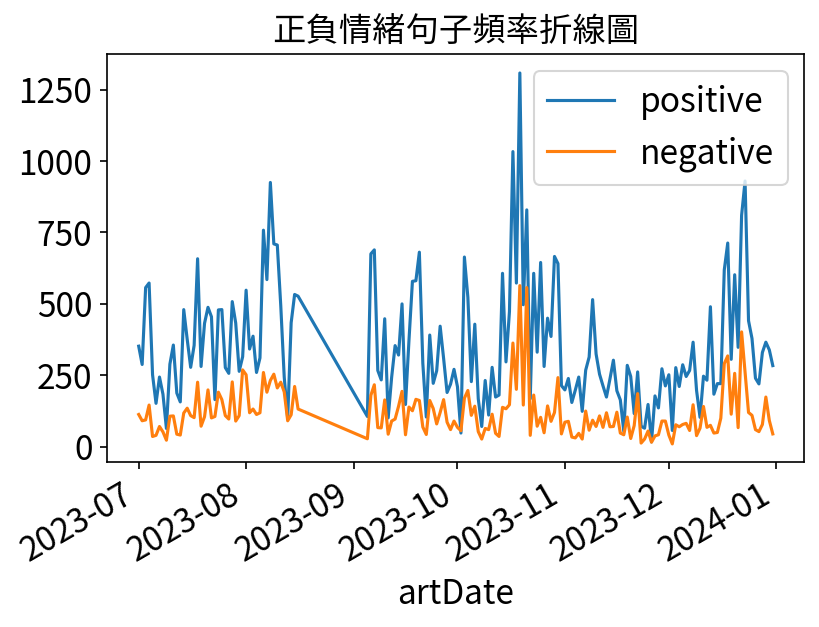

In [ ]:
fprop = fm.FontProperties(fname="./TaipeiSansTCBeta-Regular.ttf")
colors = ["tab:blue", "tab:orange"]
pos = sentiment_count[sentiment_count["label"] == "positive"]
neg = sentiment_count[sentiment_count["label"] == "negative"]

# fig, ax = plt.subplots(figsize = (6,4), dpi = 150) # 也可以在該圖設定參數
fig, ax = plt.subplots()

ax.plot(pos["artDate"], pos["size"], color=colors[0])
ax.plot(neg["artDate"], neg["size"], color=colors[1])

plt.xlabel("artDate")
# plt.ylabel('size')
ax.legend(["positive", "negative"], loc="upper right")
fig.autofmt_xdate()
plt.title("正負情緒句子頻率折線圖", fontproperties=fprop)  # 記得加上才能顯示中文
plt.show()

* 在2023年8月和11月出現了兩次較為顯著的高峰，頻率達到1000以上
* 正面情緒詞彙的頻率遠高於負面情緒句子

#### 正負情緒聲量折線圖

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


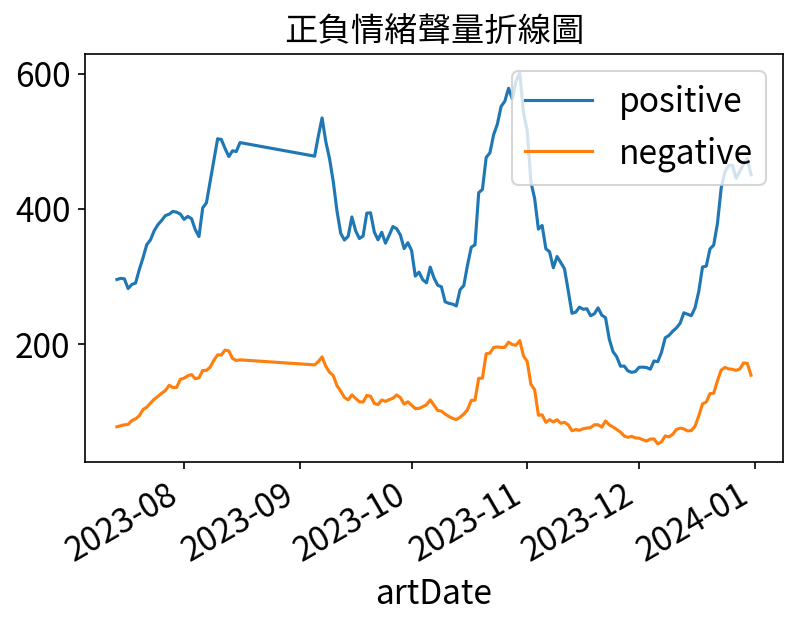

In [ ]:
colors = ["tab:blue", "tab:orange"]
pos = sentiment_count[sentiment_count["label"] == "positive"]
neg = sentiment_count[sentiment_count["label"] == "negative"]

# fig, ax = plt.subplots(figsize = (6,4), dpi = 150) # 也可以在該圖設定參數
fig, ax = plt.subplots()

# 使用 Series.rolling().mean() 來產生 14 天平均
rolling_days = 14
ax.plot(pos["artDate"], pos['size'].rolling(rolling_days).mean(), color=colors[0])
ax.plot(neg["artDate"], neg["size"].rolling(rolling_days).mean(), color=colors[1])

plt.xlabel("artDate")
# plt.ylabel('size')
ax.legend(["positive", "negative"], loc="upper right")
fig.autofmt_xdate()
plt.title("正負情緒聲量折線圖", fontproperties=fprop)  # 記得加上才能顯示中文
plt.show()

* 這五大公司整體都是有較好的評價

### 以文章為單位的情緒分析

In [ ]:
sentiment_count_by_article = pd.DataFrame(
    results_df.groupby(["artUrl", "label"]).size()
).reset_index()
sentiment_count_by_article = sentiment_count_by_article.rename(columns={0: "size"})
sentiment_count_by_article

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


artUrl     label  size
0     https://www.ptt.cc/bbs/Gossiping/M.1688140859....  negative    11
1     https://www.ptt.cc/bbs/Gossiping/M.1688140859....   neutral     5
2     https://www.ptt.cc/bbs/Gossiping/M.1688140859....  positive    35
3     https://www.ptt.cc/bbs/Gossiping/M.1688148966....  negative     1
4     https://www.ptt.cc/bbs/Gossiping/M.1688148966....   neutral     2
...                                                 ...       ...   ...
6650  https://www.ptt.cc/bbs/Tech_Job/M.1704020545.A...  negative     9
6651  https://www.ptt.cc/bbs/Tech_Job/M.1704020545.A...  positive    44
6652  https://www.ptt.cc/bbs/Tech_Job/M.1704034806.A...  negative     4
6653  https://www.ptt.cc/bbs/Tech_Job/M.1704034806.A...   neutral     1
6654  https://www.ptt.cc/bbs/Tech_Job/M.1704034806.A...  positive    40

[6655 rows x 3 columns]

In [ ]:
ptt_sentiment_value_by_article = (
    sentiment_count_by_article.pivot_table(
        index="artUrl", columns="label", values="size", fill_value=0
    )
    .reset_index()
    .rename_axis(None, axis=1)
)
ptt_sentiment_value_by_article.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


artUrl  negative  neutral  \
0  https://www.ptt.cc/bbs/Gossiping/M.1688140859....        11        5   
1  https://www.ptt.cc/bbs/Gossiping/M.1688148966....         1        2   
2  https://www.ptt.cc/bbs/Gossiping/M.1688150076....         2        3   
3  https://www.ptt.cc/bbs/Gossiping/M.1688171873....         2        2   
4  https://www.ptt.cc/bbs/Gossiping/M.1688173592....        21        6   

   positive  
0        35  
1         5  
2         1  
3        12  
4        65

In [ ]:
# sentiment 計算方式: positive - negative
ptt_sentiment_value_by_article["sentiment_value"] = (
    ptt_sentiment_value_by_article["positive"]
    - ptt_sentiment_value_by_article["negative"]
)
ptt_sentiment_value_by_article.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


artUrl  negative  neutral  \
0  https://www.ptt.cc/bbs/Gossiping/M.1688140859....        11        5   
1  https://www.ptt.cc/bbs/Gossiping/M.1688148966....         1        2   
2  https://www.ptt.cc/bbs/Gossiping/M.1688150076....         2        3   
3  https://www.ptt.cc/bbs/Gossiping/M.1688171873....         2        2   
4  https://www.ptt.cc/bbs/Gossiping/M.1688173592....        21        6   

   positive  sentiment_value  
0        35               24  
1         5                4  
2         1               -1  
3        12               10  
4        65               44

In [ ]:
ptt_sentiment_value_by_article['sentiment_class'] = ptt_sentiment_value_by_article['sentiment_value'].apply(lambda x: "positive" if x > 0 else "negative" )
ptt_sentiment_value_by_article

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


artUrl  negative  neutral  \
0     https://www.ptt.cc/bbs/Gossiping/M.1688140859....        11        5   
1     https://www.ptt.cc/bbs/Gossiping/M.1688148966....         1        2   
2     https://www.ptt.cc/bbs/Gossiping/M.1688150076....         2        3   
3     https://www.ptt.cc/bbs/Gossiping/M.1688171873....         2        2   
4     https://www.ptt.cc/bbs/Gossiping/M.1688173592....        21        6   
...                                                 ...       ...      ...   
2529  https://www.ptt.cc/bbs/Tech_Job/M.1703874209.A...         0        1   
2530  https://www.ptt.cc/bbs/Tech_Job/M.1703950238.A...         1        0   
2531  https://www.ptt.cc/bbs/Tech_Job/M.1703953890.A...        23       11   
2532  https://www.ptt.cc/bbs/Tech_Job/M.1704020545.A...         9        0   
2533  https://www.ptt.cc/bbs/Tech_Job/M.1704034806.A...         4        1   

      positive  sentiment_value sentiment_class  
0           35               24        positive  
1            5                4        positive  
2            1               -1        negative  
3           12               10        positive  
4           65               44        positive  
...        ...              ...             ...  
2529        27               27        positive  
2530        16               15        positive  
2531       134              111        positive  
2532        44               35        positive  
2533        40               36        positive  

[2534 rows x 6 columns]

In [ ]:
clear_df_sentiment = pd.merge(origin_data, ptt_sentiment_value_by_article[['artUrl', 'sentiment_class']], how="left")
clear_df_sentiment["artDate"] = pd.to_datetime(clear_df_sentiment["artDate"])
clear_df_sentiment['artDate'] = clear_df_sentiment['artDate'].dt.date
clear_df_sentiment

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


system_id                                             artUrl  \
0             1  https://www.ptt.cc/bbs/Gossiping/M.1688140859....   
1             2  https://www.ptt.cc/bbs/Gossiping/M.1688148966....   
2             3  https://www.ptt.cc/bbs/Gossiping/M.1688150076....   
3             4  https://www.ptt.cc/bbs/Gossiping/M.1688171873....   
4             5  https://www.ptt.cc/bbs/Gossiping/M.1688173592....   
...         ...                                                ...   
2486       2487  https://www.ptt.cc/bbs/Tech_Job/M.1703874209.A...   
2487       2488  https://www.ptt.cc/bbs/Tech_Job/M.1703950238.A...   
2488       2489  https://www.ptt.cc/bbs/Tech_Job/M.1703953890.A...   
2489       2490  https://www.ptt.cc/bbs/Tech_Job/M.1704020545.A...   
2490       2491  https://www.ptt.cc/bbs/Tech_Job/M.1704034806.A...   

                        artTitle     artDate     artPoster artCatagory  \
0       [新聞]美國、荷蘭揮組合拳痛擊中國晶片商SMIC  2023-07-01        ttucse   Gossiping   
1               [問卦]荷蘭艾司摩爾為啥這麼強？  2023-07-01   lonzoball02   Gossiping   
2            Re:[問卦]荷蘭艾司摩爾為啥這麼強？  2023-07-01     meblessme   Gossiping   
3          [問卦]台大電機系的學生說唸物理只能要飯？  2023-07-01       Qunnine   Gossiping   
4         [新聞]半導體競爭力隱憂！國內綠電不足，台積  2023-07-01       DANANPA   Gossiping   
...                          ...         ...           ...         ...   
2486  [新聞]台積電首度提及1奈米A10工藝預計2030年  2023-12-30      godofsex    Tech_Job   
2487   [新聞]日媒：台積電熊本廠擬2024年2/24開幕  2023-12-30  qazxc1156892    Tech_Job   
2488     [新聞]台積電美國廠必須轉彎了！為何劉德音將退  2023-12-31          AAAB    Tech_Job   
2489             [新聞]三星旗艦機來了台鏈吃補  2023-12-31    hvariables    Tech_Job   
2490      [新聞]熊本知事：台積電設廠是百年一遇大機會  2023-12-31      godofsex    Tech_Job   

                                             artContent  \
0     美國、荷蘭揮組合拳痛擊中國晶片商 SMIC遭盯上\nhttps://m.moneydj.co...   
1     荷蘭公司艾司摩爾\n做半導體的\n\n半導體台灣不是世界最頂的嗎？\n\n荷蘭不是剩文化和觀...   
2     荷蘭沒有on call, 沒有高工時，沒有996 沒有低薪\n就是家歐洲公司\n不用賣新鮮肝...   
3     前陣子經過公館啦！\n\n應該是電機系的學生\n\nA：我覺得你碩班還是唸電機的好\n\n跑...   
4     1.媒體來源: 科技新報\n\n2.記者署名: 林妤柔\n\n3.完整新聞標題:\n半導體競...   
...                                                 ...   
2486  台積電首度提及1奈米A10工藝　預計2030年完成\n\n2023/12/28 15:16\...   
2487  新聞標題： 日媒：台積電熊本廠擬2024年2/24開幕\n\n（中央社東京30日綜合外電報導...   
2488  https://www.businesstoday.com.tw/article/categ...   
2489  https://udn.com/news/story/7240/7676644\n三星旗艦機...   
2490  熊本知事：台積電設廠是百年一遇重大機會\n\nYahoo奇摩（即時新聞）\n\n2023年1...   

                                             artComment             e_ip  \
0     [{"cmtStatus": "推", "cmtPoster": "WeAntiTVBS",...    218.172.21.71   
1     [{"cmtStatus": "→", "cmtPoster": "whiteadam", ...     118.167.2.61   
2     [{"cmtStatus": "→", "cmtPoster": "showwin", "c...    42.73.130.239   
3     [{"cmtStatus": "噓", "cmtPoster": "railman", "c...   118.167.19.120   
4     [{"cmtStatus": "→", "cmtPoster": "s820912gmail...    106.64.160.11   
...                                                 ...              ...   
2486  [{"cmtStatus": "推", "cmtPoster": "ohohohya", "...    49.216.191.98   
2487  [{"cmtStatus": "推", "cmtPoster": "oldchang1205...  223.137.217.103   
2488  [{"cmtStatus": "推", "cmtPoster": "sinon17", "c...   123.194.181.81   
2489  [{"cmtStatus": "噓", "cmtPoster": "pf775", "cmt...    61.230.162.42   
2490  [{"cmtStatus": "→", "cmtPoster": "gn01216674",...    49.216.191.98   

             insertedDate dataSource sentiment_class  
0     2023-07-01 01:48:29        ptt        positive  
1     2023-07-02 01:33:04        ptt        positive  
2     2023-07-02 01:33:04        ptt        negative  
3     2023-07-02 01:33:45        ptt        positive  
4     2023-07-02 01:34:00        ptt        positive  
...                   ...        ...             ...  
2486  2023-12-31 02:22:26        ptt        positive  
2487  2023-12-31 02:22:26        ptt        positive  
2488  2023-12-31 02:22:26        ptt        positive  
2489  2024-01-01 02:19:00        ptt        positive  
2490  2024-01-01 02:19:00        ptt        posit

In [ ]:
sentiment_art_count = pd.DataFrame(
    clear_df_sentiment.groupby(["artDate", "sentiment_class"]).size()
).reset_index()
sentiment_art_count = sentiment_art_count.rename(columns={0: "size"})
sentiment_art_count = sentiment_art_count.sort_values(["artDate"])
sentiment_art_count

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


artDate sentiment_class  size
0    2023-07-01        negative     4
1    2023-07-01        positive    13
2    2023-07-02        negative     2
3    2023-07-02        positive     9
4    2023-07-03        positive    15
..          ...             ...   ...
304  2023-12-28        positive     5
305  2023-12-29        negative     4
306  2023-12-29        positive     8
307  2023-12-30        positive     9
308  2023-12-31        positive     5

[309 rows x 3 columns]

#### 正負文章數趨勢折線圖

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


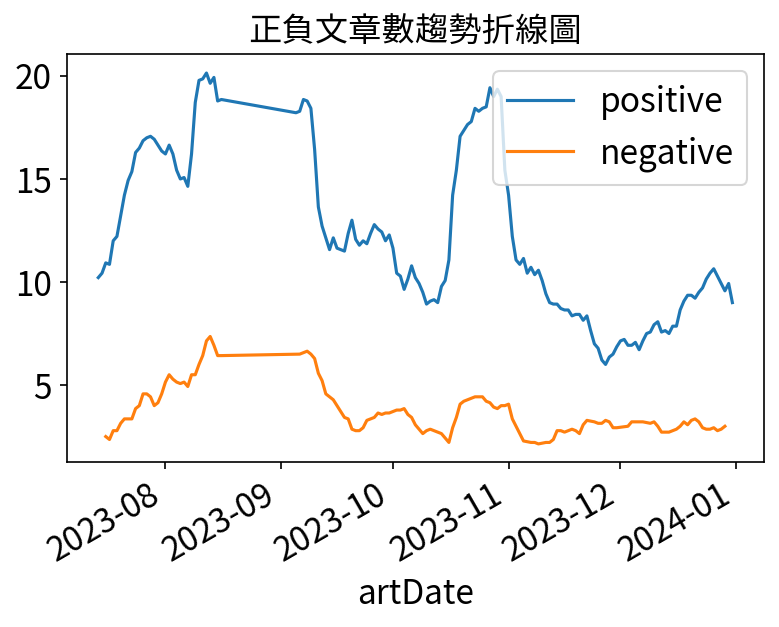

In [ ]:
colors = ["tab:blue", "tab:orange"]
pos = sentiment_art_count[sentiment_art_count["sentiment_class"] == "positive"]
neg = sentiment_art_count[sentiment_art_count["sentiment_class"] == "negative"]

# fig, ax = plt.subplots(figsize = (6,4), dpi = 150) # 也可以在該圖設定參數
fig, ax = plt.subplots()

# 使用 Series.rolling().mean() 來產生 14 天平均
rolling_days = 14
ax.plot(pos["artDate"], pos['size'].rolling(rolling_days).mean(), color=colors[0])
ax.plot(neg["artDate"], neg["size"].rolling(rolling_days).mean(), color=colors[1])
# ax.plot(pos["artDate"], pos['size'], color=colors[0])
# ax.plot(neg["artDate"], neg["size"], color=colors[1])

plt.xlabel("artDate")
# plt.ylabel('size')
ax.legend(["positive", "negative"], loc="upper right")
fig.autofmt_xdate()
plt.title("正負文章數趨勢折線圖", fontproperties=fprop)  # 記得加上才能顯示中文
plt.show()

* 與正面情緒相比，負面情緒相對穩定且較低
* 正面文章數量遠高於負面文章數量

## 繪製實體關係圖

### 基本繪圖方法

利用adjacency matrix 建立graph

In [ ]:
# 隨機生成十六進制顏色碼
def random_color():
  r = lambda: random.randint(0,255)
  return '#%02X%02X%02X' % (r(),r(),r())

# 透過 adjacency matrix 建立 graph
def matPresentGraph(mat:np.array, node_id:list, node_type:list = None, node_value:list = None, directed = True, edge_color = None) -> pyvis.network.Network:
  '''
    根據輸入的matrix建立網路圖
    mat: adjacency matrix
    node_id: 要設定的節點id
    node_type: 用來區分不同類型的節點（例如：不同群組），會作為節點的title
    node_value: 節點大小
    directed: 有向/無向
    edge_color: edge顏色

  '''

  # 如果設定為無向圖，則檢查輸入的 matrix 是否對稱
  if directed != True:
    if (mat == mat.transpose()).all():
      print('matrix is Symmetric')
    else:
      print('matrix is not Symmetric')

  # 若無設定 node_type，則為所有節點設置相同的顏色(隨機)和類型
  if node_type == None:
    c = random_color()
    node_colors = [c for i in range(len(node_id))]
    node_type = [" " for i in range(len(node_id))]

  else: # 若有設定node_type，則為每種類型分配一個隨機顏色
    node_color_map = {}

    for i in set(node_type):
      while True:
        c = random_color()
        if c not in node_color_map.values():
          break
      node_color_map[i] = c

    node_colors = [node_color_map[i] for i in node_type]

  # 若無設定edge_color，則設置隨機顏色
  if edge_color == None:
    edge_color = random_color()
  # edge_color = random_color()

  # 若無設定node_value，則設定所有節點的大小為1
  if node_value == None:
    node_value = [1 for i in range(len(node_id))]

  net = pyvis.network.Network(notebook=True, directed = directed, cdn_resources='in_line')

  # 加入點
  net.add_nodes(
      nodes = node_id,
      value = node_value,
      label = node_id,
      title = node_type,
      color = node_colors
  )

  # 加入邊
  for row in range(len(node_id)):
    for col in range(len(node_id)):
      if mat[row][col] > 0.:
        net.add_edge(
            node_id[row], node_id[col], width = mat[row][col], color = edge_color, title = mat[row][col]
        )

  return net

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


* 讀取科技業工作版+八卦版的結果資料

In [ ]:
# 讀取科技業工作版+八卦版的結果資料
entity_table = pd.read_csv("./raw_data/entity_table_techjob.csv")
entity_table

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


system_id        word     ner
0              1          美國     GPE
1              1          荷蘭     GPE
2              1          中國     GPE
3              1         晶片商     ORG
4              1         郭妍希  PERSON
...          ...         ...     ...
59329       2491          蒲島  PERSON
59330       2491          蒲島  PERSON
59331       2491          蒲島  PERSON
59332       2491  兆億日圓約新台幣億元   MONEY
59333       2491          熊本     GPE

[59334 rows x 3 columns]

### 將NER為ORG和GPE的資料篩選出來，轉成DTM後繪製其關聯圖

In [ ]:
# 篩選ner為ORG,GPE的資料
l_noun = ["ORG","GPE"]
ORG = entity_table[entity_table.ner.isin(l_noun)]
ORG

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


system_id word  ner
0              1   美國  GPE
1              1   荷蘭  GPE
2              1   中國  GPE
3              1  晶片商  ORG
5              1   美國  GPE
...          ...  ...  ...
59324       2491   台灣  GPE
59326       2491   熊本  GPE
59327       2491   台北  GPE
59328       2491   高雄  GPE
59333       2491   熊本  GPE

[33049 rows x 3 columns]

依所在的文章把ORG和GPE相關的字詞選出並以空格隔開

In [ ]:
org_df = ORG.groupby('system_id')['word'].agg(lambda x: ' '.join(x)).reset_index()
org_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


system_id                                               word
0             1  美國 荷蘭 中國 晶片商 美國 荷蘭 中國 北京 路透社 荷蘭 政府 艾司摩爾 中國 荷蘭 ...
1             2                                      艾司摩爾 台灣 荷蘭 荷蘭
2             3                                             荷蘭 台積電
3             4                                            電機系 台積電
4             5  台積電三星 台積電三星 台積電 台灣 台積電 台灣 美國 台灣 台灣 南韓 海力士 亞洲 美...
...         ...                                                ...
2404       2487                 台積電 台北 台積電 英特爾 台積電 台積電 台積電 台積電 台積電
2405       2488  台積電熊本廠 中央社 東京日綜合 日媒 台積電子公司 日本 日本 熊本縣 菊陽町 日本 熊本...
2406       2489  台積電美國廠 台美 台積電 台積電 美國 台積電 美國亞歷桑那廠 工會 台積電 美國 台積電...
2407       2490     台北 美國 加州聖荷西 路透 美國 加州聖荷西 台積電大立 晶技 蘋果 台積電 大立光 晶技
2408       2491  熊本 台積電設廠 奇摩 熊本縣 台積電 熊本縣 日本 熊本縣 中央社 日本 讀賣新聞 熊本縣...

[2409 rows x 2 columns]

將資料轉成DTM後計算每個字之間的Correlation

In [ ]:
vectorizer = CountVectorizer(min_df = 3, max_features = 100)
X = vectorizer.fit_transform(org_df["word"])
vocabulary = vectorizer.get_feature_names_out()

# 轉成dataframe
DTM_df = pd.DataFrame(columns = vocabulary, data = X.toarray())
DTM_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


三星  三星電子  中共  中國  中國大陸  中央  中央社  中時  中時新聞網  中科  ...  陽明交大  韓國  高市府  高通  \
0      0     0   0   9     0   0    0   0      0   0  ...     0   0    0   0   
1      0     0   0   0     0   0    0   0      0   0  ...     0   0    0   0   
2      0     0   0   0     0   0    0   0      0   0  ...     0   0    0   0   
3      0     0   0   0     0   0    0   0      0   0  ...     0   0    0   0   
4      0     0   0   2     0   0    0   0      0   0  ...     0   0    0   0   
...   ..   ...  ..  ..   ...  ..  ...  ..    ...  ..  ...   ...  ..  ...  ..   
2404   0     0   0   0     0   0    0   0      0   0  ...     0   0    0   0   
2405   0     0   0   0     0   0    1   0      0   0  ...     0   0    0   0   
2406   0     0   0   0     0   0    0   0      0   0  ...     0   0    0   0   
2407   0     0   0   0     0   0    0   0      0   0  ...     0   0    0   0   
2408   0     0   0   0     0   0    1   0      0   0  ...     0   0    0   0   

      高雄  高雄市  高雄廠  鳳凰城  鴻海  龍潭  
0      0    0    0    0   0   0  
1      0    0    0    0   0   0  
2      0    0    0    0   0   0  
3      0    0    0    0   0   0  
4      0    0    0    0   0   0  
...   ..  ...  ...  ...  ..  ..  
2404   0    0    0    0   0   0  
2405   0    0    0    0   0   0  
2406   0    0    0    0   0   0  
2407   0    0    0    0   0   0  
2408   1    0    0    0   0   0  

[2409 rows x 100 columns]

In [ ]:
# 計算詞之間的相關係數
corr_matrix = np.corrcoef(DTM_df.T)

# 轉成dataframe
Cor_df = pd.DataFrame(corr_matrix, index = DTM_df.columns, columns = DTM_df.columns)

Cor_df.reset_index(inplace = True, drop = True)

Cor_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


三星      三星電子        中共        中國      中國大陸        中央       中央社  \
0   1.000000  0.076538 -0.005679  0.011620  0.035367 -0.009284 -0.012649   
1   0.076538  1.000000 -0.004534 -0.004412  0.053343 -0.007412 -0.010099   
2  -0.005679 -0.004534  1.000000  0.104341  0.045855  0.071807 -0.004760   
3   0.011620 -0.004412  0.104341  1.000000  0.119559  0.025240  0.072517   
4   0.035367  0.053343  0.045855  0.119559  1.000000 -0.007015 -0.016191   
..       ...       ...       ...       ...       ...       ...       ...   
95 -0.007451 -0.005948  0.003522 -0.013751 -0.009536 -0.000329  0.003026   
96 -0.009538 -0.007615 -0.007925 -0.024810 -0.012208  0.027501 -0.017651   
97 -0.006454 -0.005153 -0.005363 -0.016094 -0.008261 -0.008766 -0.000053   
98 -0.006906 -0.005514  0.001446  0.015648 -0.008839  0.026832  0.022047   
99 -0.009875 -0.007884  0.008489  0.011198 -0.012639 -0.013412 -0.002860   

          中時     中時新聞網        中科  ...      陽明交大        韓國       高市府        高通  \
0   0.024564  0.079232 -0.007988  ...  0.000475  0.080608 -0.006600  0.170110   
1  -0.007148 -0.009412 -0.006377  ... -0.004536  0.179750 -0.005269  0.079044   
2  -0.007439 -0.009795 -0.006637  ... -0.004720  0.005814 -0.005484 -0.007215   
3   0.011535 -0.026661 -0.018801  ... -0.012679  0.073290 -0.018662  0.024122   
4   0.099511  0.008093 -0.010224  ... -0.007271  0.007703 -0.008447  0.032253   
..       ...       ...       ...  ...       ...       ...       ...       ...   
95  0.007407 -0.012849  0.000109  ... -0.006192  0.001325  0.066894 -0.009465   
96  0.098973 -0.016449  0.058234  ... -0.007927 -0.014587  0.173680 -0.012117   
97 -0.008454 -0.001973 -0.007542  ... -0.005364 -0.007372 -0.006232 -0.008199   
98 -0.009045  0.022575 -0.008070  ... -0.005740 -0.001152 -0.006668 -0.008773   
99  0.026407 -0.017030  0.055800  ... -0.008207 -0.015102  0.052209 -0.012545   

          高雄       高雄市       高雄廠       鳳凰城        鴻海        龍潭  
0  -0.019125 -0.007451 -0.009538 -0.006454 -0.006906 -0.009875  
1  -0.015269 -0.005948 -0.007615 -0.005153 -0.005514 -0.007884  
2   0.002359  0.003522 -0.007925 -0.005363  0.001446  0.008489  
3  -0.031873 -0.013751 -0.024810 -0.016094  0.015648  0.011198  
4  -0.023663 -0.009536 -0.012208 -0.008261 -0.008839 -0.012639  
..       ...       ...       ...       ...       ...       ...  
95  0.272235  1.000000  0.093537 -0.007035 -0.007527  0.008761  
96  0.219498  0.093537  1.000000 -0.009006 -0.004676  0.009272  
97 -0.018059 -0.007035 -0.009006  1.000000 -0.006521 -0.009324  
98  0.072986 -0.007527 -0.004676 -0.006521  1.000000 -0.009977  
99  0.013763  0.008761  0.009272 -0.009324 -0.009977  1.000000  

[100 rows x 100 columns]

In [ ]:
# 讓對角等於0
mat = Cor_df.values

di = [i for i in range(mat.shape[0])]
mat[di,di] = 0
mat[mat<0.1] = 0
mat = mat*10

mat

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### 觀看文字之間的相關性，較粗的線條代表相關性較高

In [ ]:
org_list = vocabulary

net = matPresentGraph(mat,org_list,directed = False)
net.show("./pic/netWork.html")
IPython.display.HTML('netWork.html')

matrix is not Symmetric
./netWork.html


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


從關係圖中我們可以看到一些科技業龍頭的關係，由於在該地新設廠的緣故，台積電與「美國」、「亞利桑那」等關係密切，還有跟日本熊本廠的關係也很緊密，或許未來重心想往美國和日本發展的員工可以前往台積電追求較理想的求職環境。<br/><br/>
而艾司摩爾除了公司所在國家「荷蘭」關係較明顯以外，與南韓的三星電子也有密切的關聯，大機率是因為前述的文字雲提到的2023年年底傳出三星電子和艾斯摩爾合作的消息。<br/><br/>
美光的部分，與經濟部的關係較密切，可能是因為2023年與經濟部水利署簽署水資源永續公私協力合作意向書的關係。<br/><br/>
而聯發科與高通相連則可能是因為兩間公司本身就是勁敵的關係，皆是手機晶片的兩大巨頭，有什麼樣的新技術可能會互相較勁等等



## 結論

* 從一開始的NER的ORG種類數比較還有相關文章的篩選，可以看出台積電(TSMC)依然是最有名並且最常被拿出來討論的公司。經過篩選，我們可以從一些細節了解到不同公司的優勢以及被正向討論的字詞。像是台積電的文字雲分析顯示，台積電的討論集中在新廠設立、技術創新和全球佈局等方面，這反映出台積電在科技業中的領先地位和創新能力。<br/><br/>

* 通過主題模型分析，我們發現各家公司在不同主題上的討論熱點。例如，艾司摩爾與南韓三星的合作成為一個重要話題，這表明艾司摩爾在全球半導體供應鏈中的關鍵角色。美光與台積電合作相關主題也顯示出美光在半導體製造中的重要合作夥伴關係。聯發科和群聯電子的討論則更多集中在技術突破和產品創新上，這些討論反映了這兩家公司在特定技術領域的競爭優勢和市場反應。<br/><br/>

* 從整體的情緒分析來看，可以看出這五大企業台灣的頂尖科技業，整體的情緒趨勢都是以正面為導向，也就是說各家企業的技術、貿易或是競爭能力都有很大的突破，實力不可小覷。這些正向情緒的高比例表示民眾和投資者對這些公司的未來發展持有信心，也反映了他們在全球市場上的影響力。<br/><br/>

* 最後通過社群網絡圖分析，展示了各家龍頭公司之間的相互關聯和合作關係。這些關聯圖不僅揭示了企業之間的合作夥伴關係，還顯示了它們在全球市場中的戰略佈局。例如，台積電與美國和日本的密切合作，以及艾司摩爾與三星電子的緊密聯繫，這些關係對於全球半導體產業的動向非常重要。<br/><br/>

* 以上這些分析結果不僅幫助求職者了解各家公司在市場中的地位和工作環境，還為公司提供了有價值的市場洞察，幫助科技業制定更有效的發展策略。通過這些深入的分析，我們能夠為科技業的求職者提供具體的建議，幫助他們在選擇職業道路時做出更明智的決定。